# COGS 109: Clustering of Wholesale Customers

## Source and Brief Description

## Research Question:
How is the purchasing of wholesale products distributed by channel and region in Portugal? 

## Hypothesis and Reasoning
We hypothesize that between the variables of frozen, fresh, and grocery products there will be cluster groupings 
associated with the channel labels. However, we do not expect any clusters to resemble the groupings by the region label. This is because while we expect retailers to carry products such as groceries and frozen products as that’s what customers are looking for at store locations, we expect restaurants to have a preference for fresh products as ingredients for their meals. As frozen, fresh, and grocery products are all very common across the developed world, we expect them to also be evenly distributed throughout the locations, making them not ideal for clusters.


## Overview
The purpose of our project is to explore the wholesale of staple products like groceries, detergent, paper etc. in Portugal. We aim to identify market segments through the use of k-means clustering on data about annual spending of wholesale products by region (Lisbon, Oporto or other) and channel (Hotel, Restaurant, Cafe or Retail).Motivation of this project and selecting the given dataset was to incorporate our knowledge to decipher spending trends.

## Execution Method Information
In order to find similarities in our data we will use kmeans clustering, which allows you to group data by similarity (without knowing what similarity they will be grouped by). The algorithm works by generating centers in the data and allotting each data point to a cluster defined by its center based on its euclidean distance from the centers. The centers are regularly updated until each data point is in its optimal cluster. 

Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers#

Each row in the dataset refers to a business that is the client of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. The Channel column has 2 unique values for the type of businesses: horeca (Hotel/Restaurant/Cafa) and retailers. 
Our data contains 8 attributes:
Frozen Products: Annual Expenditure 
Fresh Products: Annual Expenditure 
Grocery Products: Annual Expenditure 
Delicatessen Products: Annual Expenditure 
Detergent and Paper Products: Annual Expenditure 
Milk Products: Annual Expenditure
Region: Lisbon, Oporto or other 
Channel: Horeca (Cafe, Hotel and Restaurant) and Retail 

Out of these we chose Region and Attributes to be our labels, and removed them from the dataset. 


## Importing Important Modules:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.express as explot
import itertools
import warnings

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn import metrics
from sklearn.metrics import silhouette_score
from scipy.stats import boxcox, probplot, norm, shapiro

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings("ignore")

## Importing the CSV Data and Gathering Information:


In [3]:
# comment out for mounting google drive

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COGS109/Wholesale_customers_data.csv')
data = pd.read_csv('Wholesale_customers_data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Methodology Part 1
First we began by temporarily removing the labels, as clustering is intended for unlabeled data.

In [4]:
# store Channel column. Could be used as labels for the dataset?
Channel = data['Channel']
Region = data['Region']

# Change this if planning to use these 2 columns
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


## Visualization and Analyses:

### Utilizing seaborn.barplot as visualizatoin package

Show point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

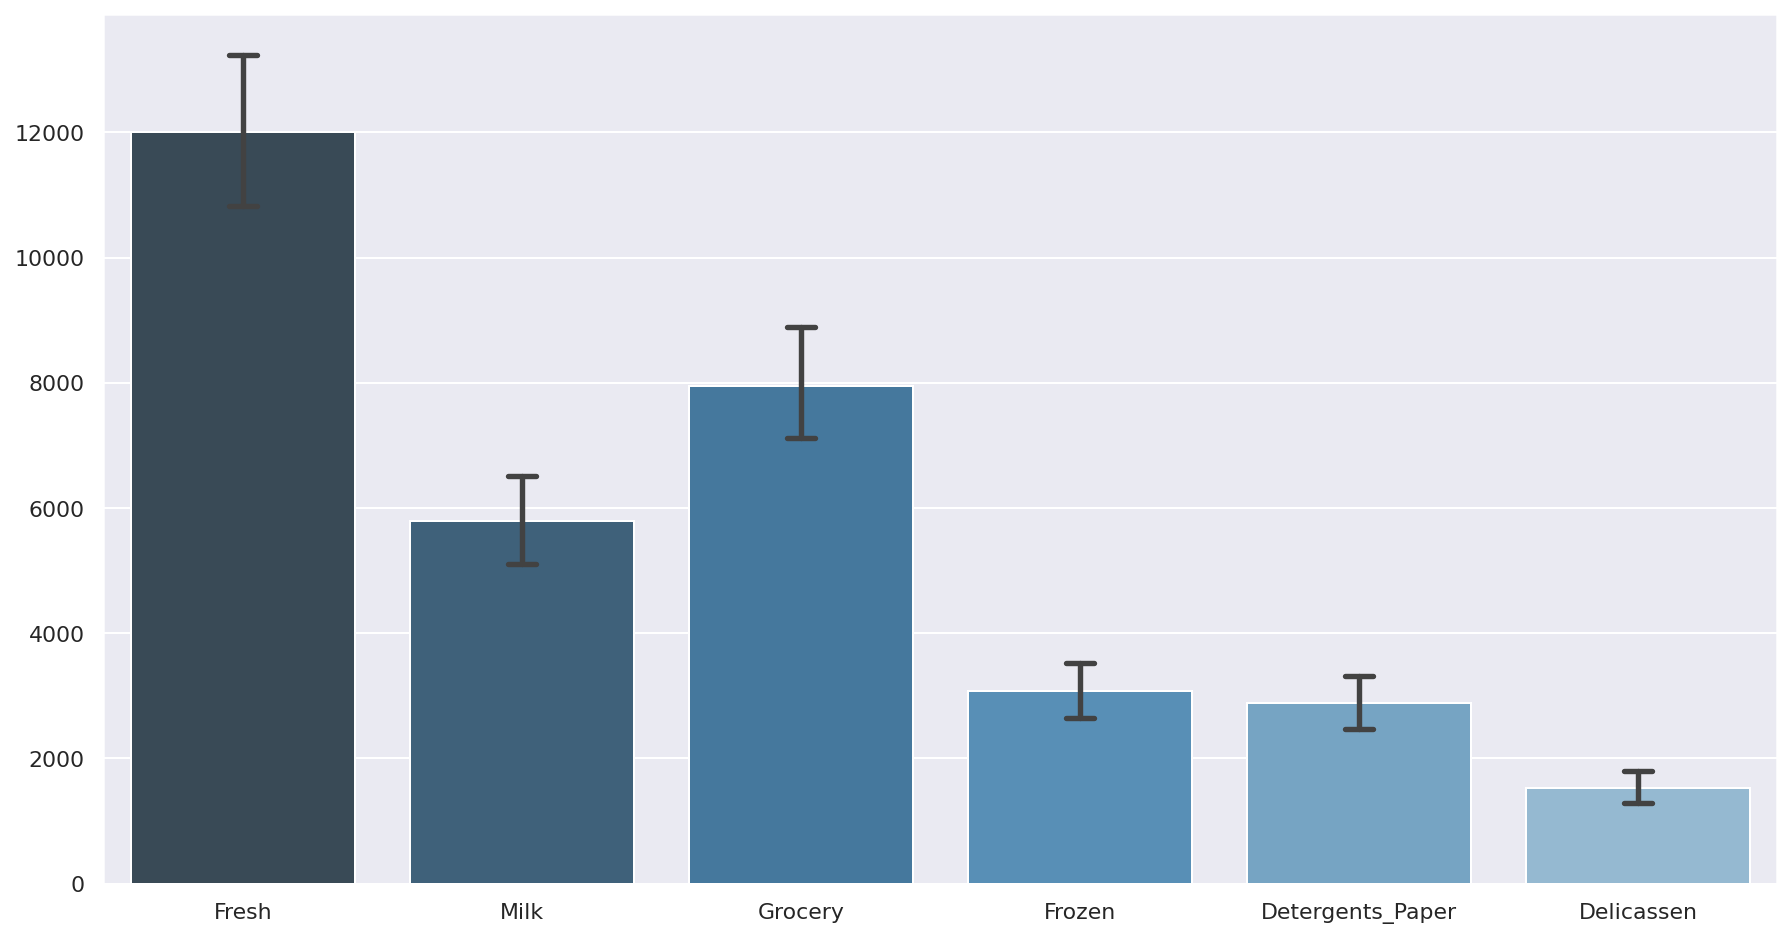

In [8]:
plt.figure(figsize = (15,8))
# sns.set_theme(style="whitegrid")
sns.barplot(data=data, capsize=.1, palette="Blues_d")
plt.show()

## Analyzation:

As percieved through the Seaborn Barplot, the first nominal category of Fresh has an approximate value of 12000, which exceeds the next highest category of Grocery by a staggering 4000. The confidence interval for Fresh extends from 11000 to 13000, giving an estimate of the true value of the Fresh category. Grocery has the next preceeding value of 8000, with confidence interval of approximately 7000 to 9000. This cateogry is the next popular nominal category in the business. Next, the milk category has a confidence interval of around 7000 to 5000, with an estimate count of 5900, which corresponds to a gross business client. Both Frozen and Detergents_Paper have the same count of around 3000, with the interval ranging from higher 3000s, approximately 3700, to lower quartile 3000s, around 3200. Lastly, the least popular business model is the Delicassen nominal group. This categorical group has less that 2000 in count, around 1750 with a confidence interval of around 1600 to 1900.

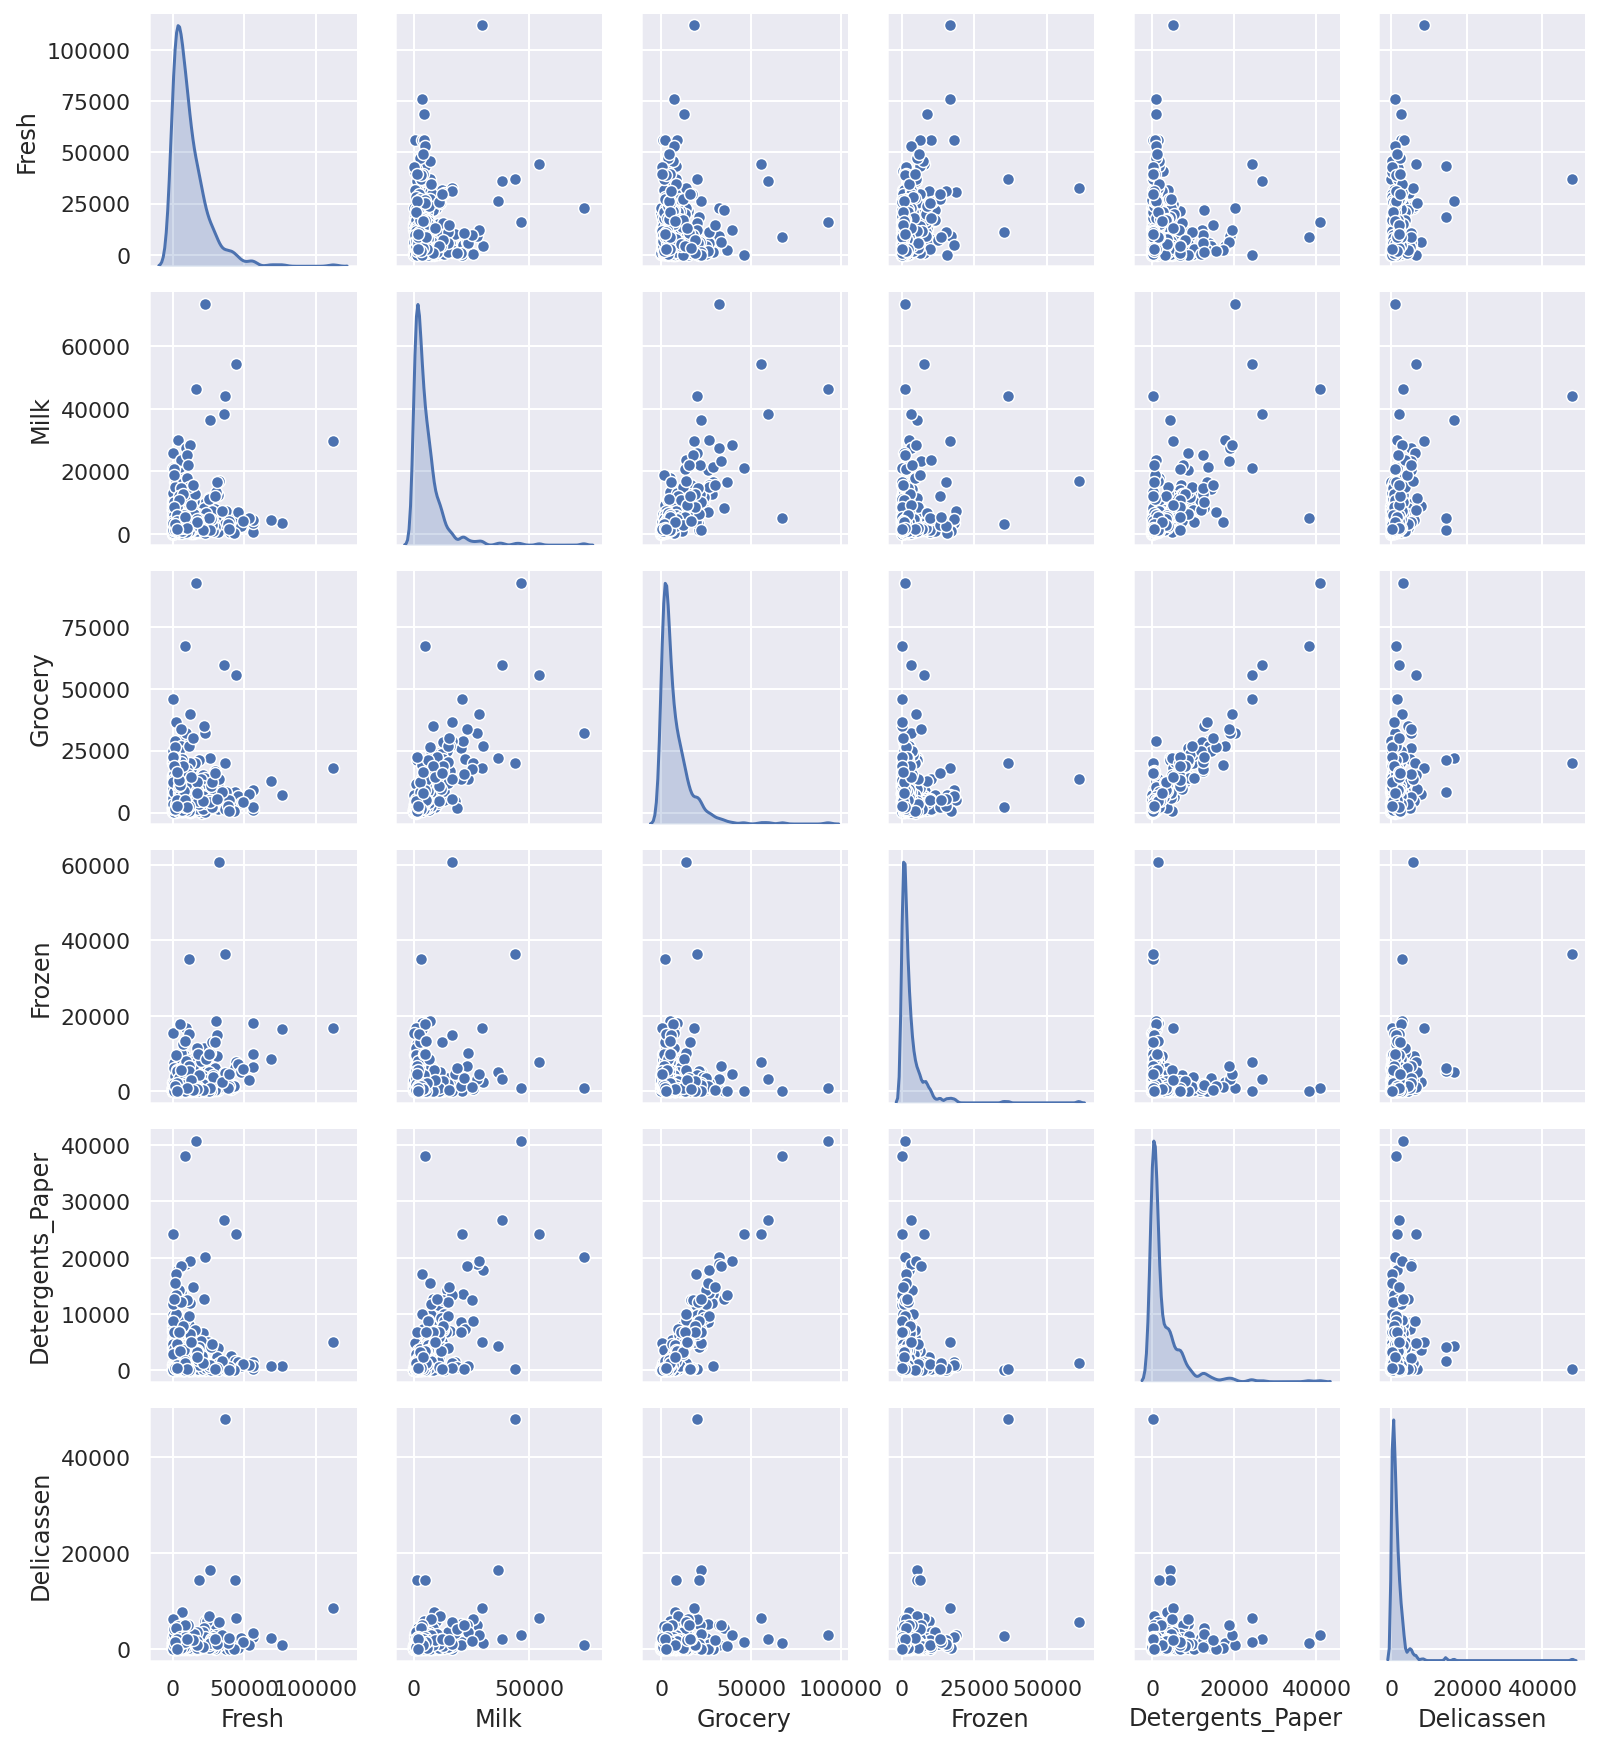

In [9]:
# un-comment to plot pairs

_ = sns.pairplot(data, diag_kind = 'kde', height=2, aspect=0.9)

Data is not normall distributed. We can try different transformations to find one that suits this dataset.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html#scipy.stats.probplot

https://stackoverflow.com/questions/48108582/how-to-interpret-scipy-stats-probplot-results

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html


## Data Transformation for Data Normalization

Since the data spans a space that is not normalized, we attempt to draw out a noramalized space. This preprocessing of the data allows for unskewed data that has a reduced span.After standardization, we considered two different transformations: box cox and log. Box Cox transformation changes a non-normal data into a normal shape.  Having normal (Gaussian) data is an important assumption for many machine learning algorithms. The formula for Cox-Box transformation uses a parameter (lambda) which ranges from -5 to 5. Log transformation is a case of Cox-Box transformation, that is, when lambda is zero the Cox-Box formula is log(y). It is not necessary to do either of these but it helps with the visualization of our data. We tried both transformations and found that our data looked better with box cox, and therefore decided to keep it.

## Visualization of the Regular Data

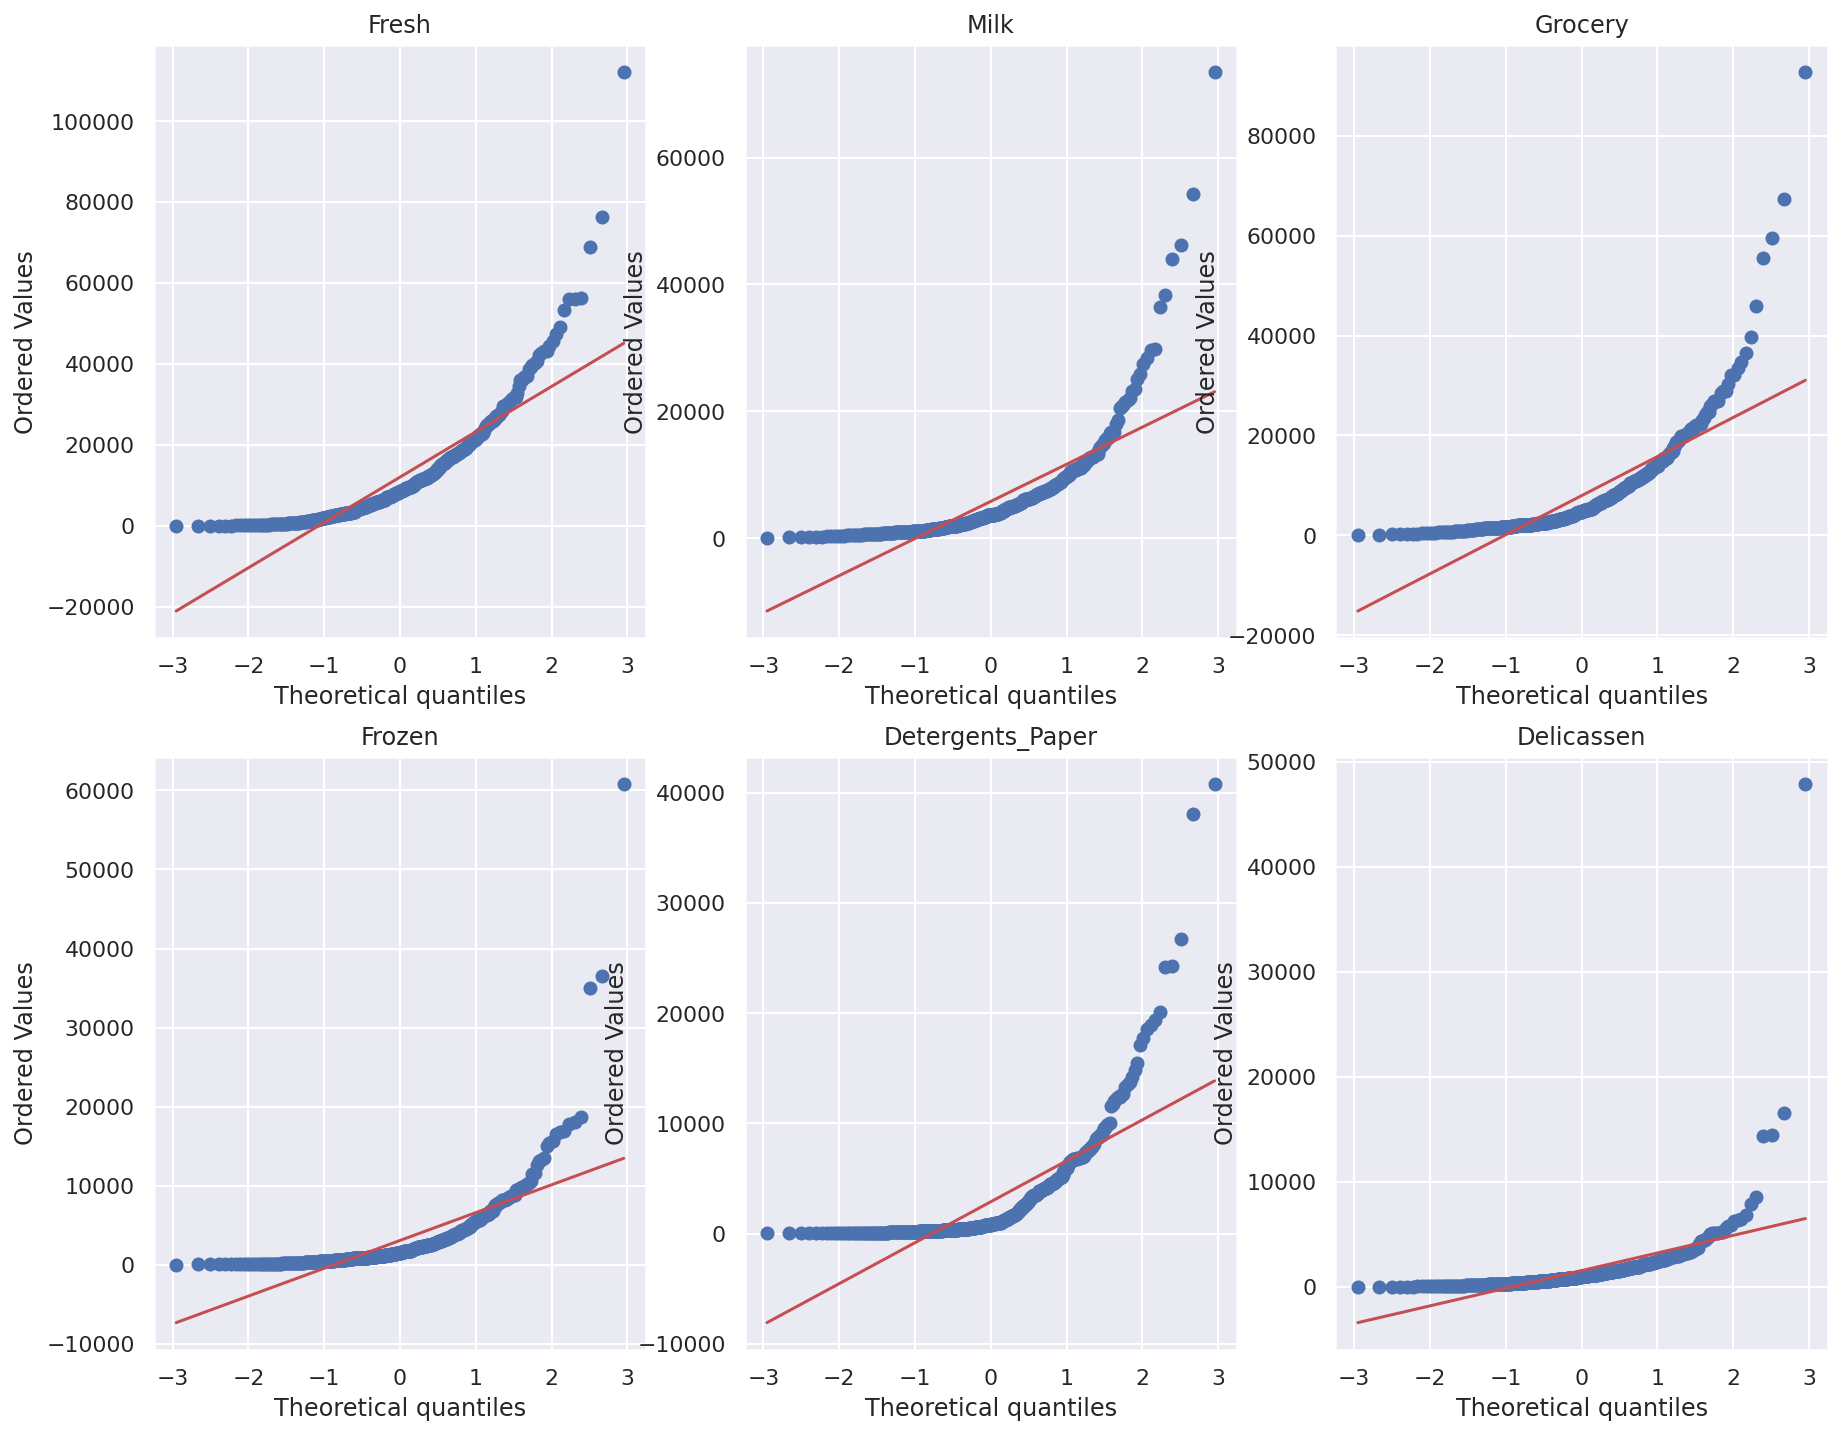

,Tests,p-value
Fresh,0.781436,7.918286e-24
Milk,0.628334,9.762062e-30
Grocery,0.676231,3.906209e-28
Frozen,0.528297,1.291332e-32
Detergents_Paper,0.605482,1.914593e-30
Delicassen,0.361068,1.753408e-36


In [10]:
# testing on regular data

test = {}
plt.figure(figsize=(15, 12))

for i in range(0,6):
    ax = plt.subplot(2, 3, i+1)
    probplot(x=data[data.columns[i]], dist=norm, plot=ax)
    plt.title(data.columns[i])
    test[data.columns[i]] = shapiro(data[data.columns[i]])
    
plt.show()

pd.DataFrame(test, index=['Tests', 'p-value']).T

The graphs above visualize the regular data, which helps us witness the disparity the originates from the regular data.

## Visualization of the Log Transformed Data

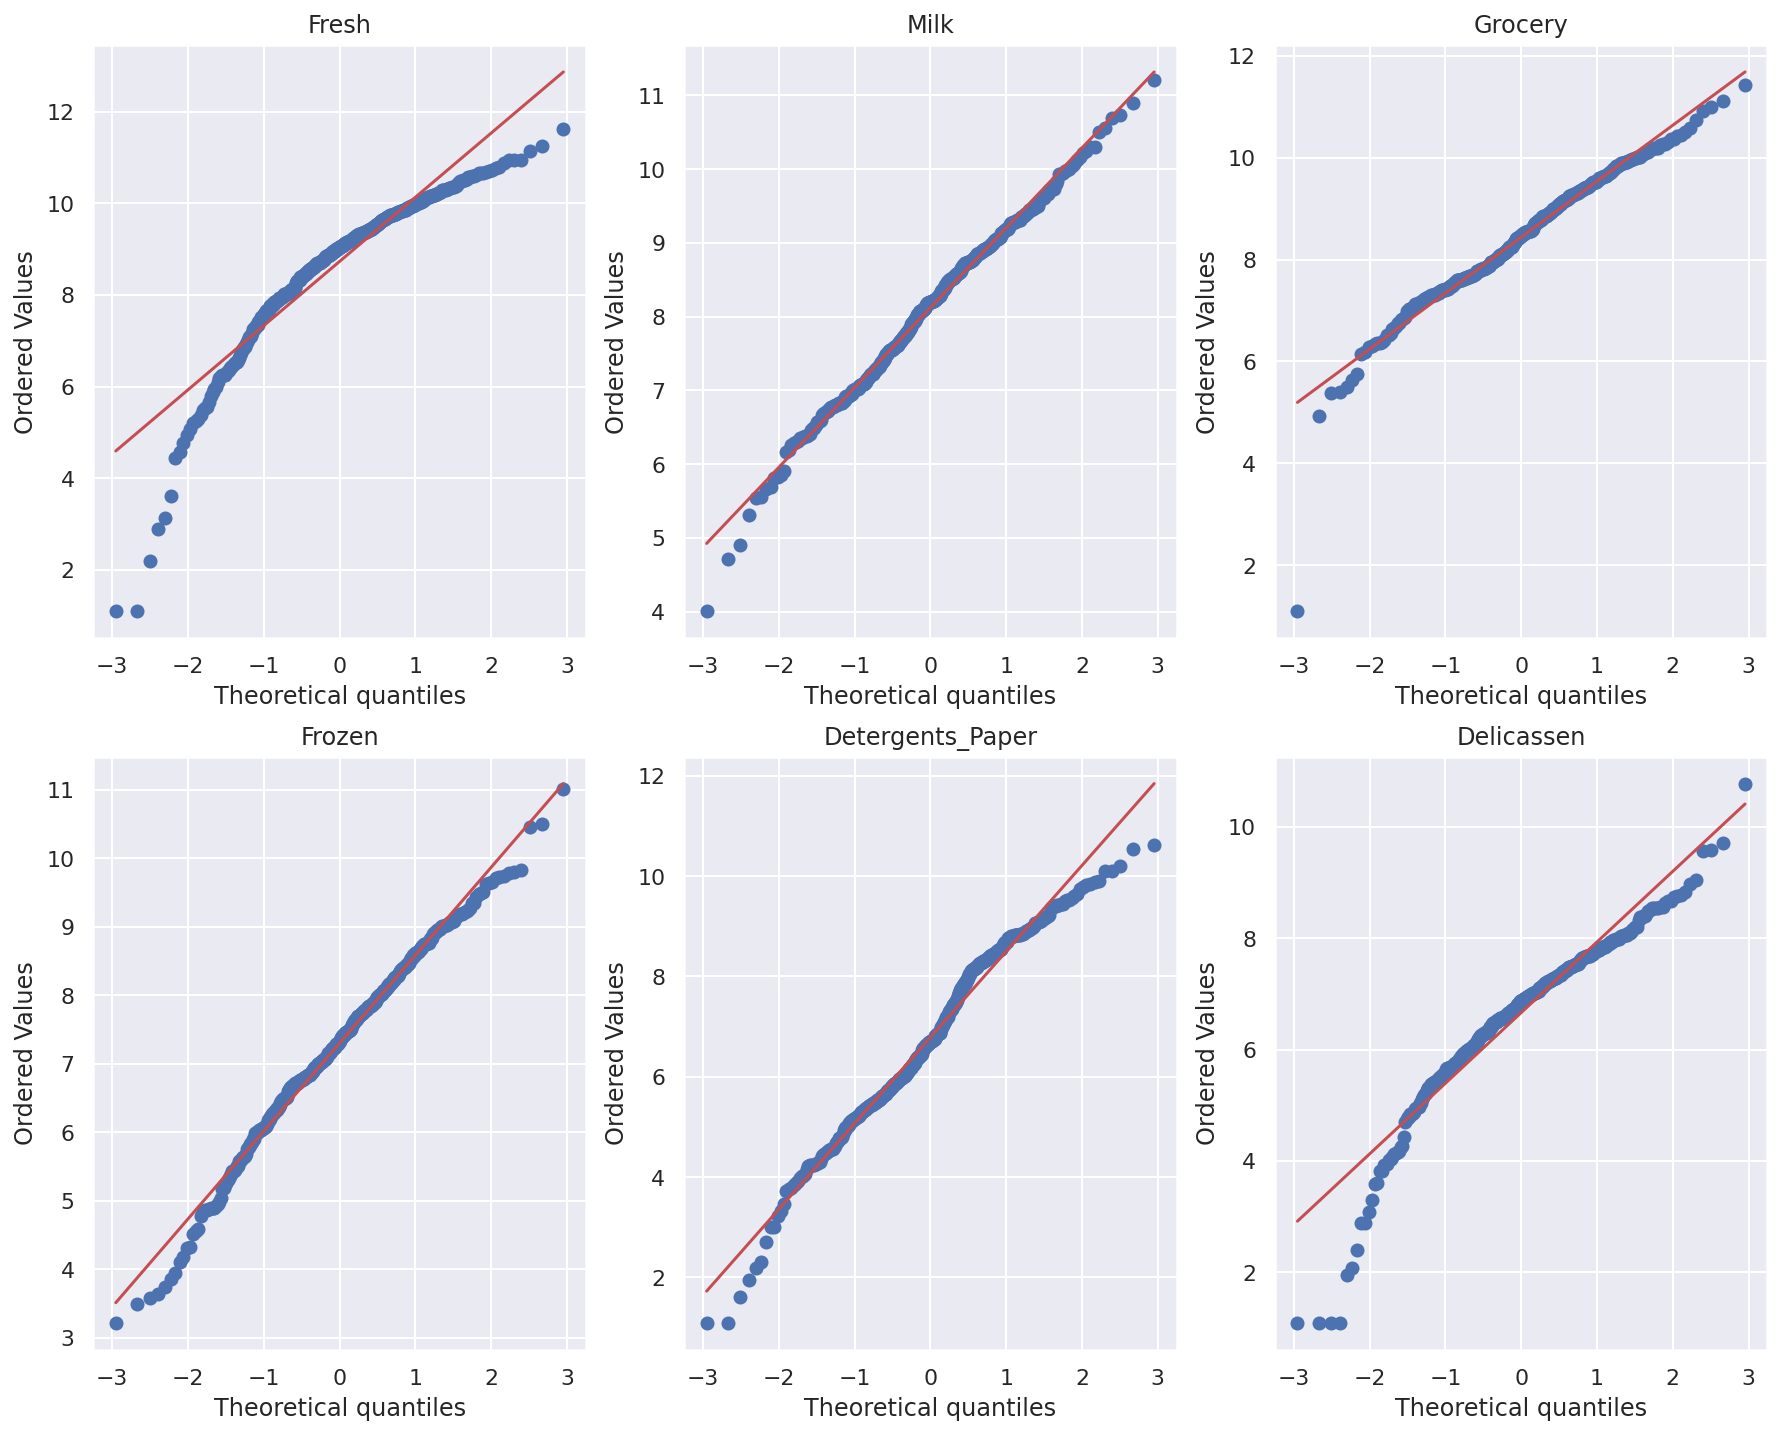

,Tests,p-value
Fresh,0.890065,3.303679e-17
Milk,0.994083,8.528145e-02
Grocery,0.964565,8.116720e-09
Frozen,0.990030,4.431482e-03
Detergents_Paper,0.981625,2.265693e-05
Delicassen,0.929627,1.575756e-13


In [11]:
# testing on log transformed data
log_data = np.log(data)

test = {}
plt.figure(figsize=(15, 12))

for i in range(0,6):
    ax = plt.subplot(2, 3, i+1)
    probplot(x=log_data[log_data.columns[i]], dist=norm, plot=ax)
    plt.title(log_data.columns[i])
    test[log_data.columns[i]] = shapiro(log_data[log_data.columns[i]])
    
plt.show()

pd.DataFrame(test, index=['Tests', 'p-value']).T

The graphs above visualize the log-transformed data, which helps us perceive the new trend of the data and if it fits a normal distribution.

## BoxCox Transformation on Regular Data

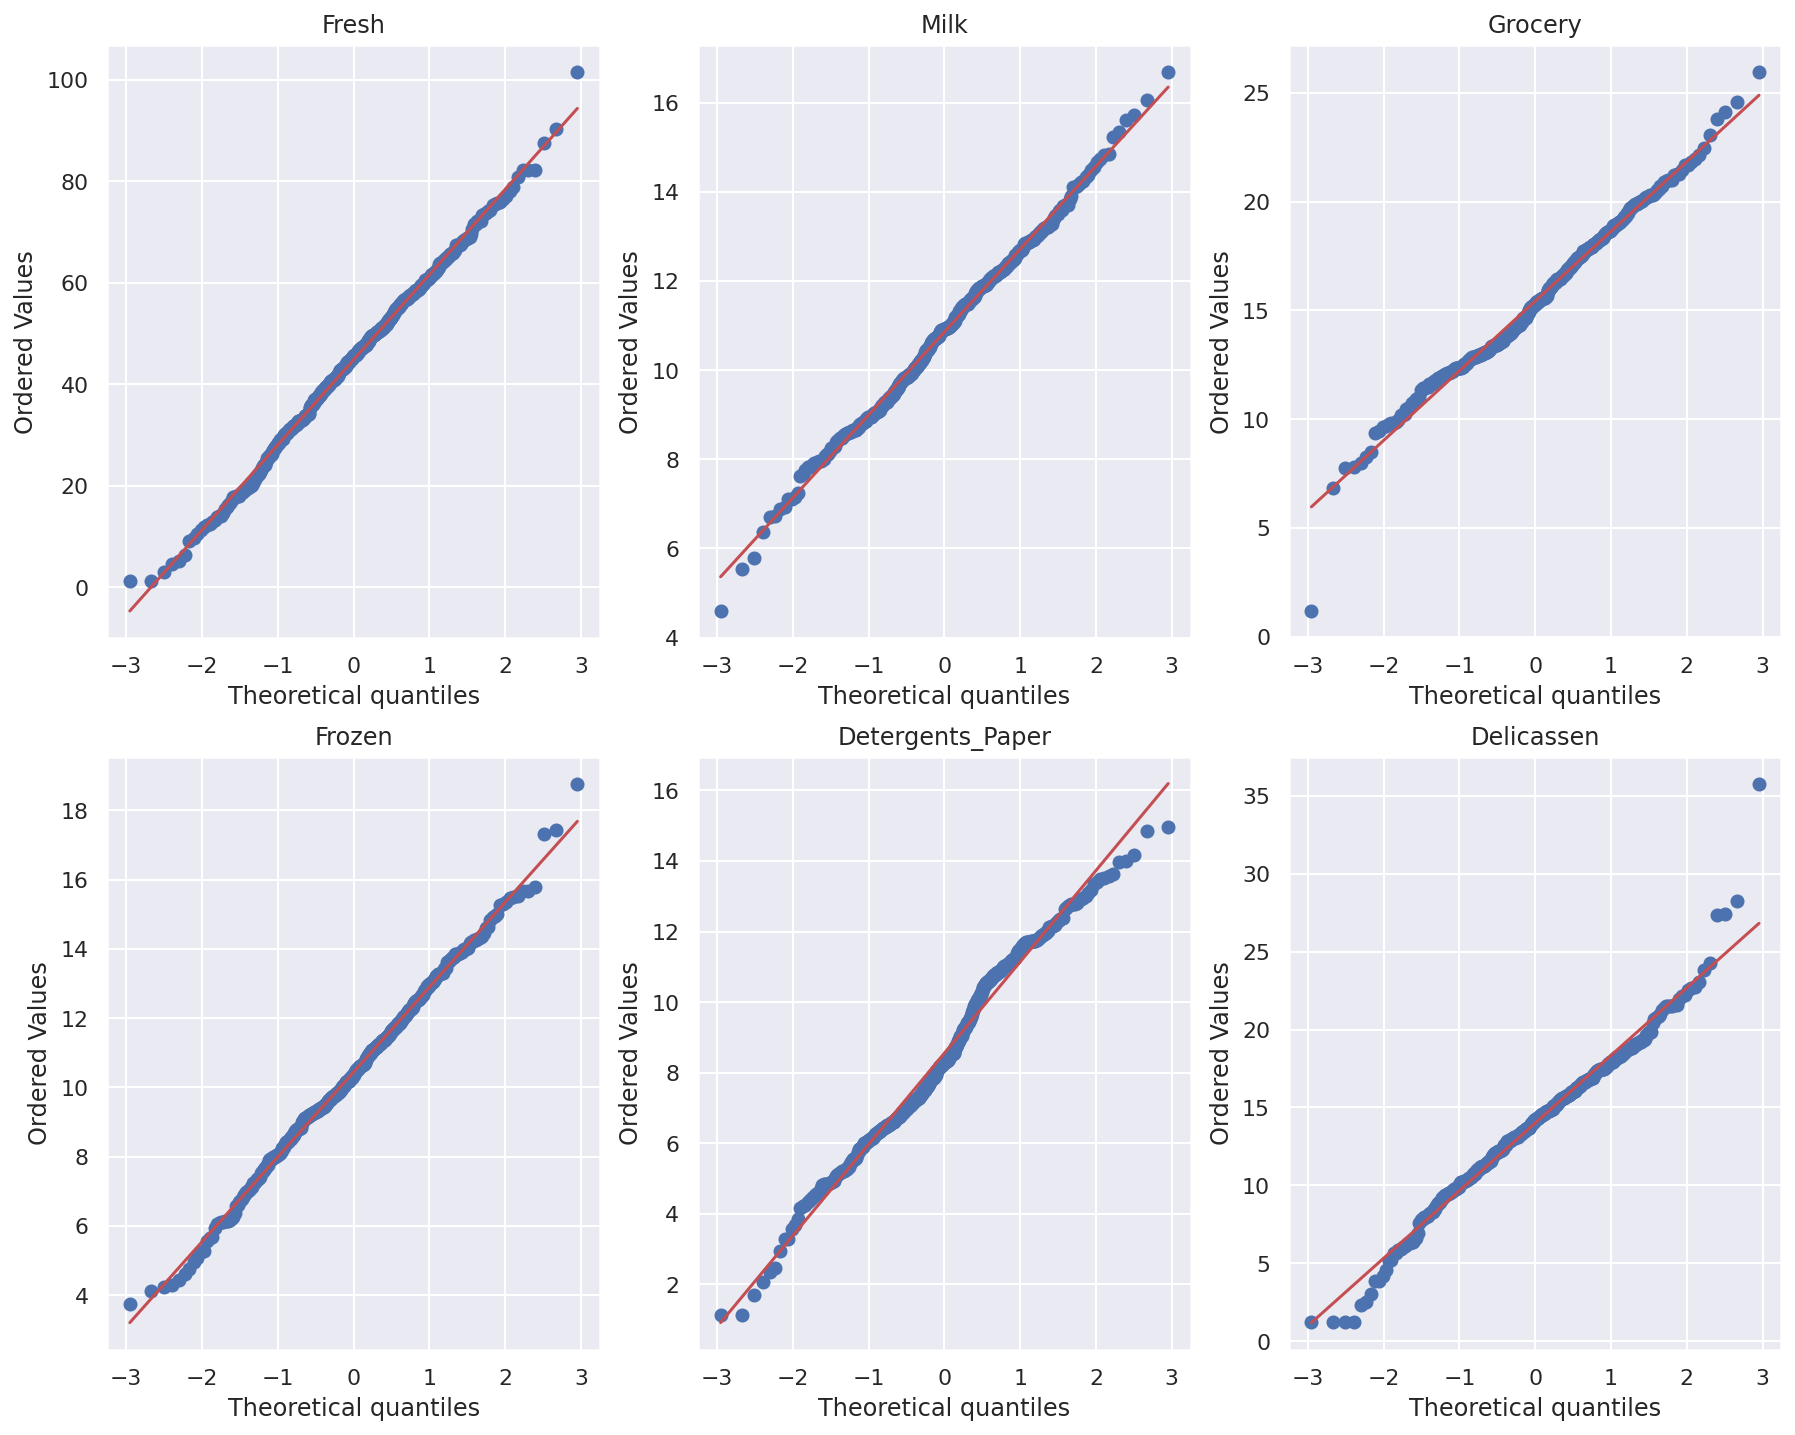

,Test,p-value
Fresh,0.997445,0.737682
Milk,0.996949,0.584299
Grocery,0.989161,0.002424
Frozen,0.997237,0.673424
Detergents_Paper,0.985208,0.000185
Delicassen,0.981869,0.000026


In [12]:
test = dict()

plt.figure(figsize=(15, 12))
plt.title('BoxCox Transformation')

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    
    # testing with boxcox transformations
    x, _ = boxcox(data[data.columns[i]])
    probplot(x = x, dist=norm, plot=ax)
    plt.title(data.columns[i])
    test[data.columns[i]] = shapiro(x)
    
plt.show()

pd.DataFrame(test, index=['Test', 'p-value']).T

The graphs above visualize the BoxCox-transformed data. In these graphs, we see a better trend towards normalization than the last methods.

## StandardizeScaler implementation on Regular Data

Standardize features by removing the mean and scaling to unit variance:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [13]:
# use box-cox as the transformation of choice and apply StandardScaler

box = PowerTransformer(method='box-cox')
box_data = box.fit_transform(data)
stnrd_data = StandardScaler().fit_transform(box_data)

data_normal = pd.DataFrame(stnrd_data, columns=data.columns)
print("Standard Scaled Data:")
data_normal.head()


Standard Scaled Data:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.412646,0.979303,0.392937,-1.456705,0.617238,0.335779
1,-0.111180,0.995096,0.626729,0.079718,0.748629,0.599877
2,-0.196043,0.887891,0.408738,0.331996,0.790324,2.245295
3,0.457763,-0.965094,-0.156523,1.173643,-0.373844,0.606332
4,1.028704,0.412455,0.344961,0.741520,0.364211,1.738881


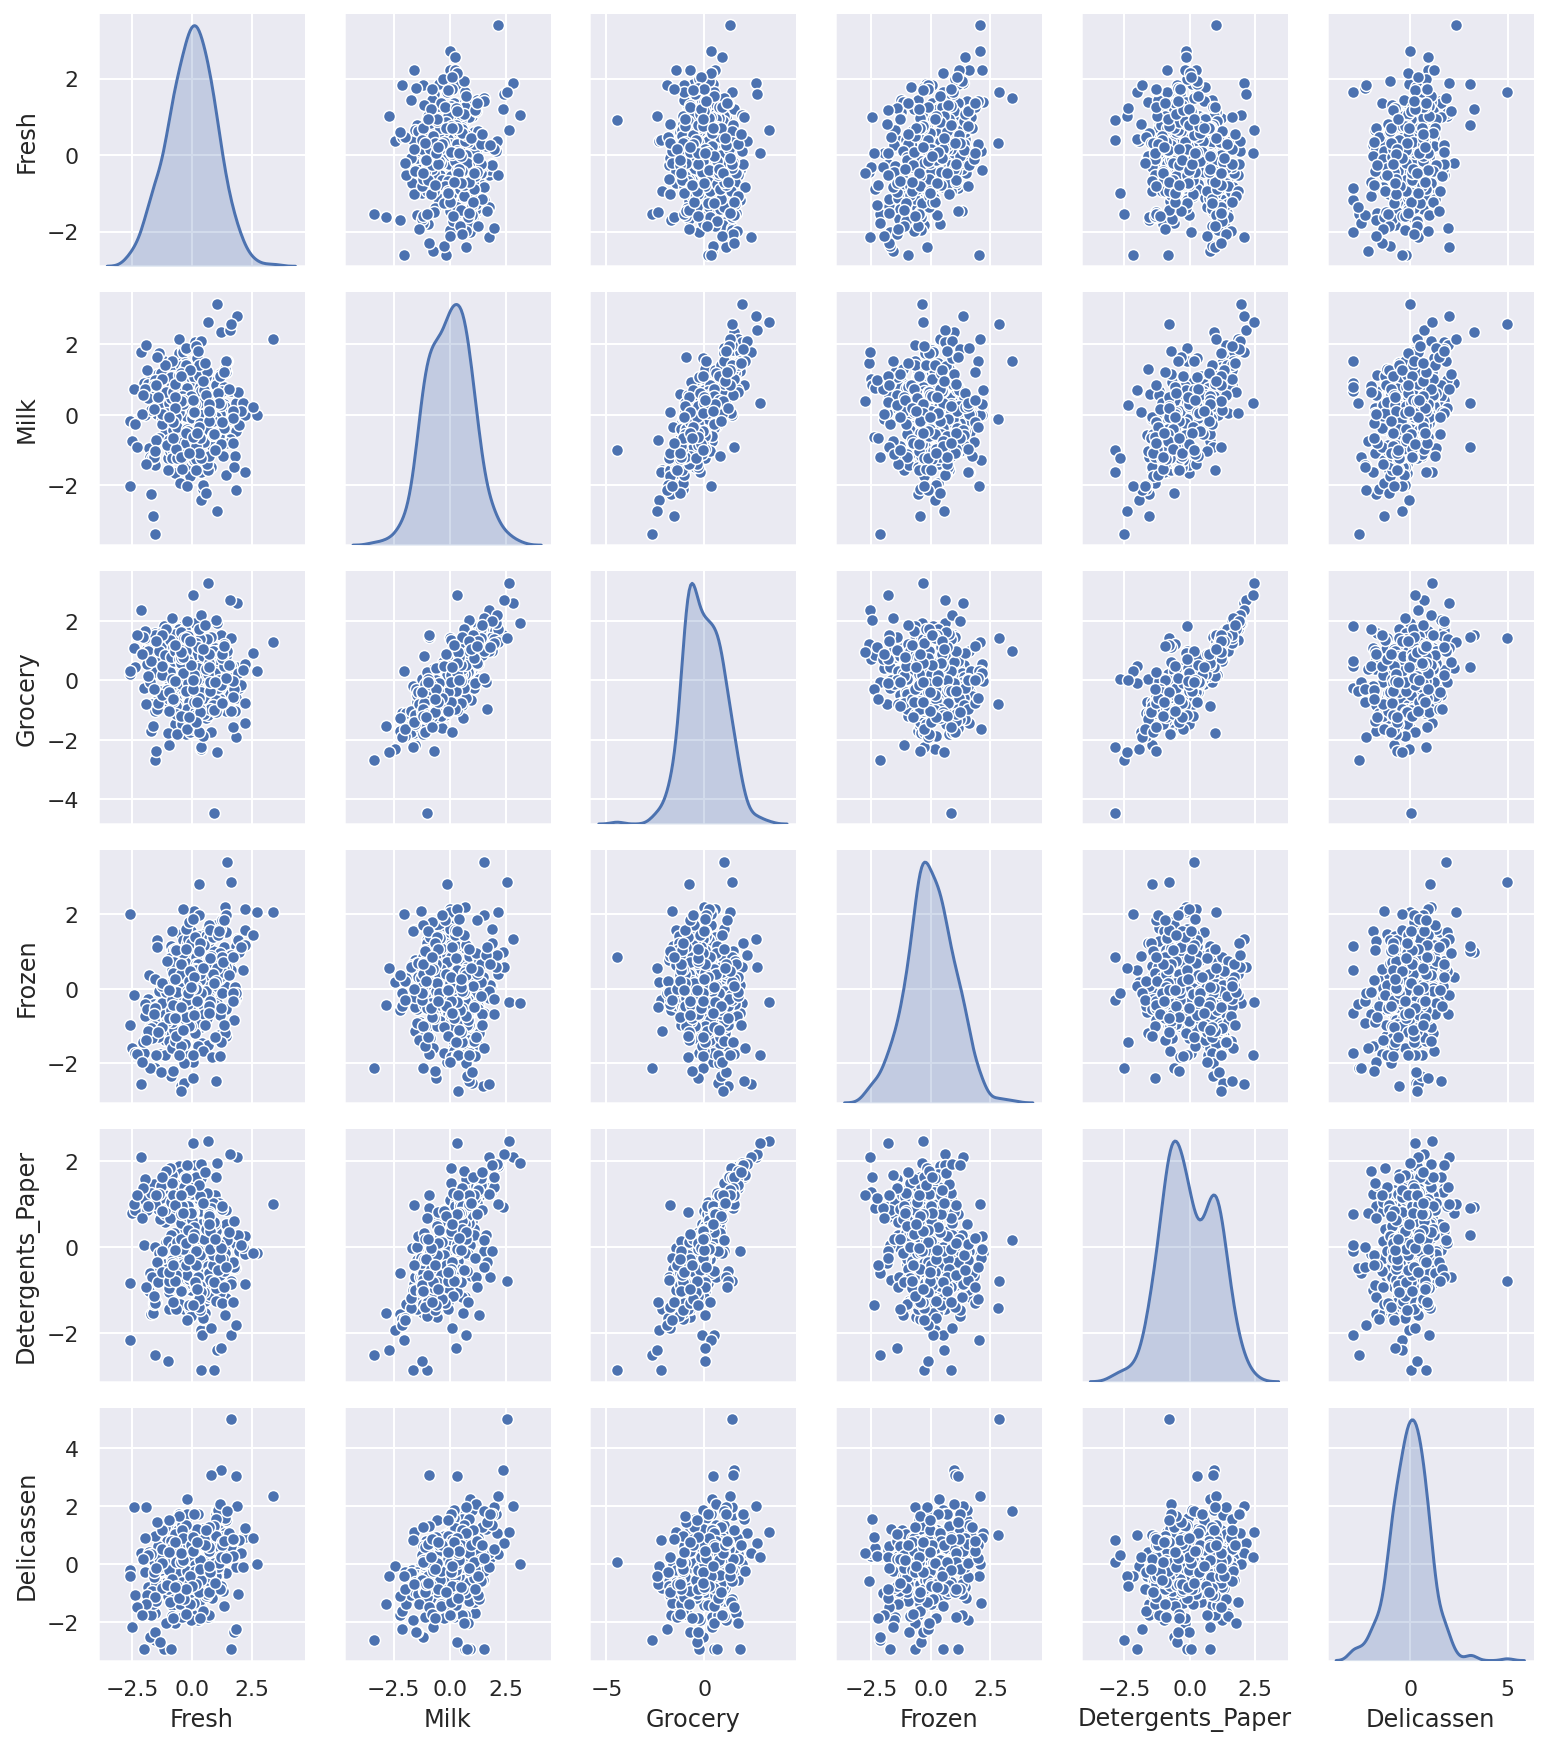

In [14]:
# un-comment to plot pairs

_ = sns.pairplot(data_normal, diag_kind = 'kde', height=2, aspect=0.9)

In [15]:
corr = data_normal.corr()
corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,-0.023114,-0.106490,0.409108,-0.180152,0.274444
Milk,-0.023114,1.000000,0.777832,-0.044705,0.684856,0.384415
Grocery,-0.106490,0.777832,1.000000,-0.161393,0.818136,0.283831
Frozen,0.409108,-0.044705,-0.161393,1.000000,-0.219160,0.277641
Detergents_Paper,-0.180152,0.684856,0.818136,-0.219160,1.000000,0.178416
Delicassen,0.274444,0.384415,0.283831,0.277641,0.178416,1.000000


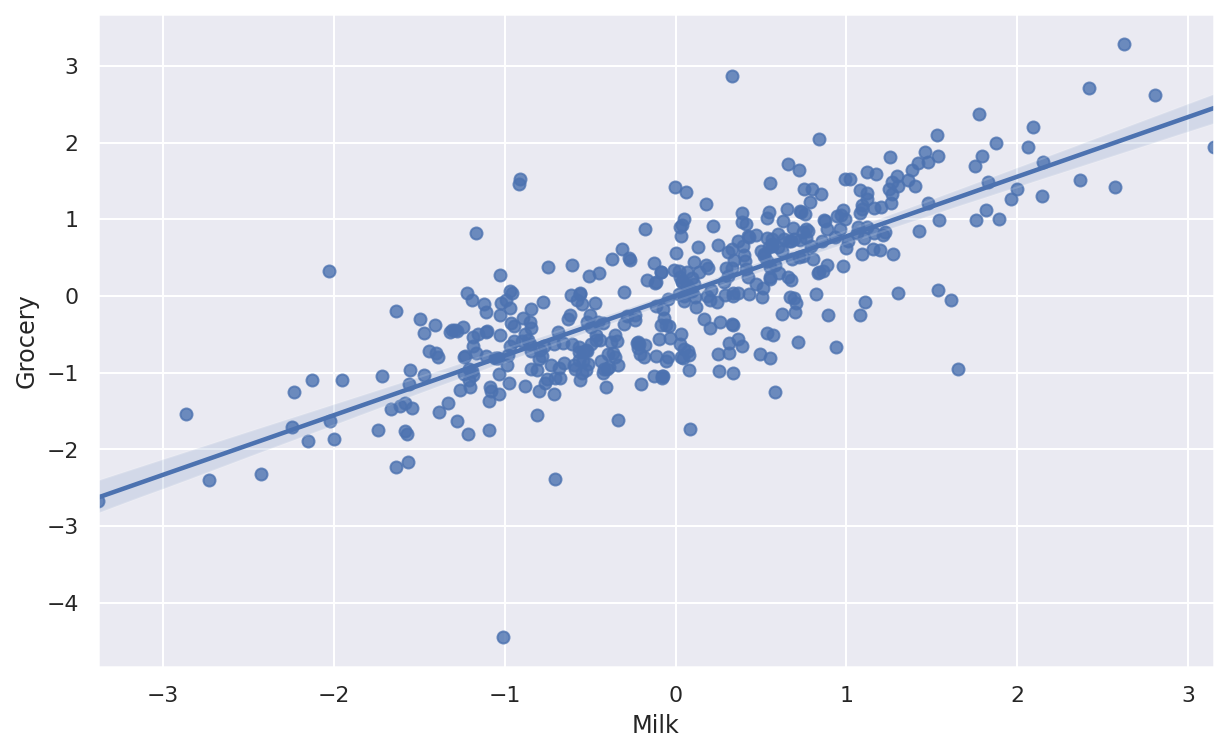

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(data=data_normal, x="Milk",y="Grocery")
plt.show()

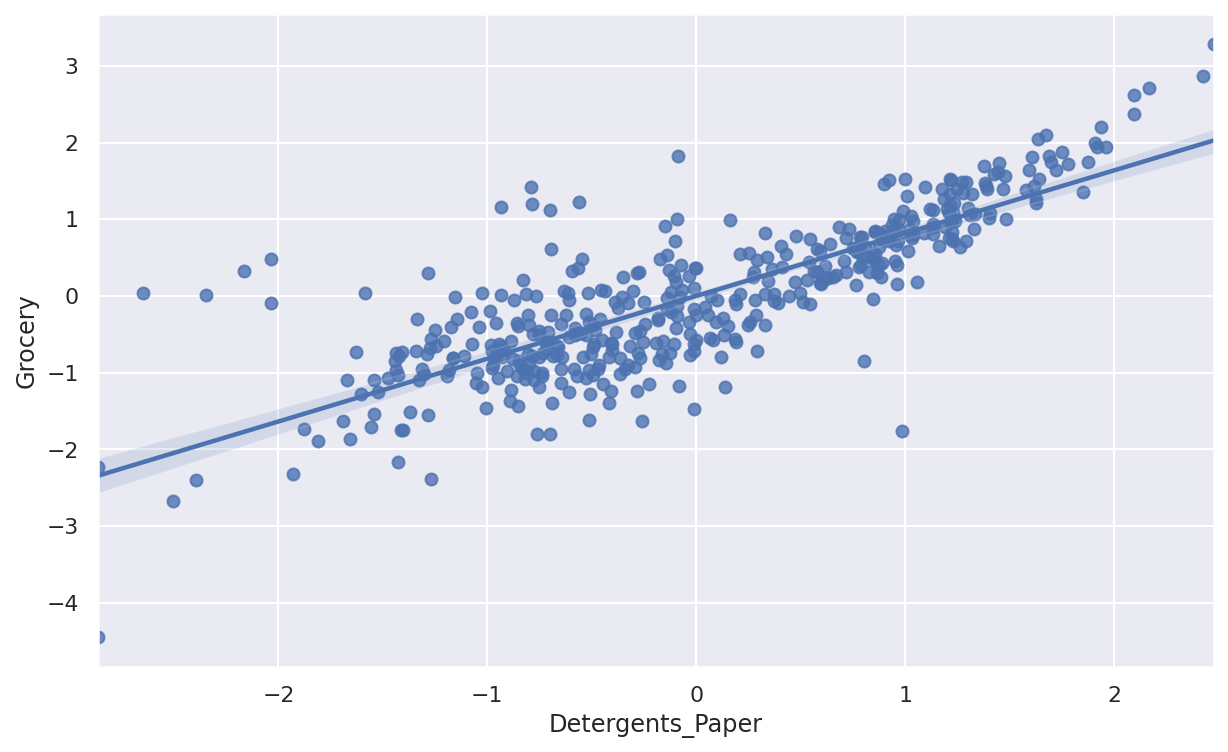

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(data=data_normal, x="Detergents_Paper",y="Grocery")
plt.show()

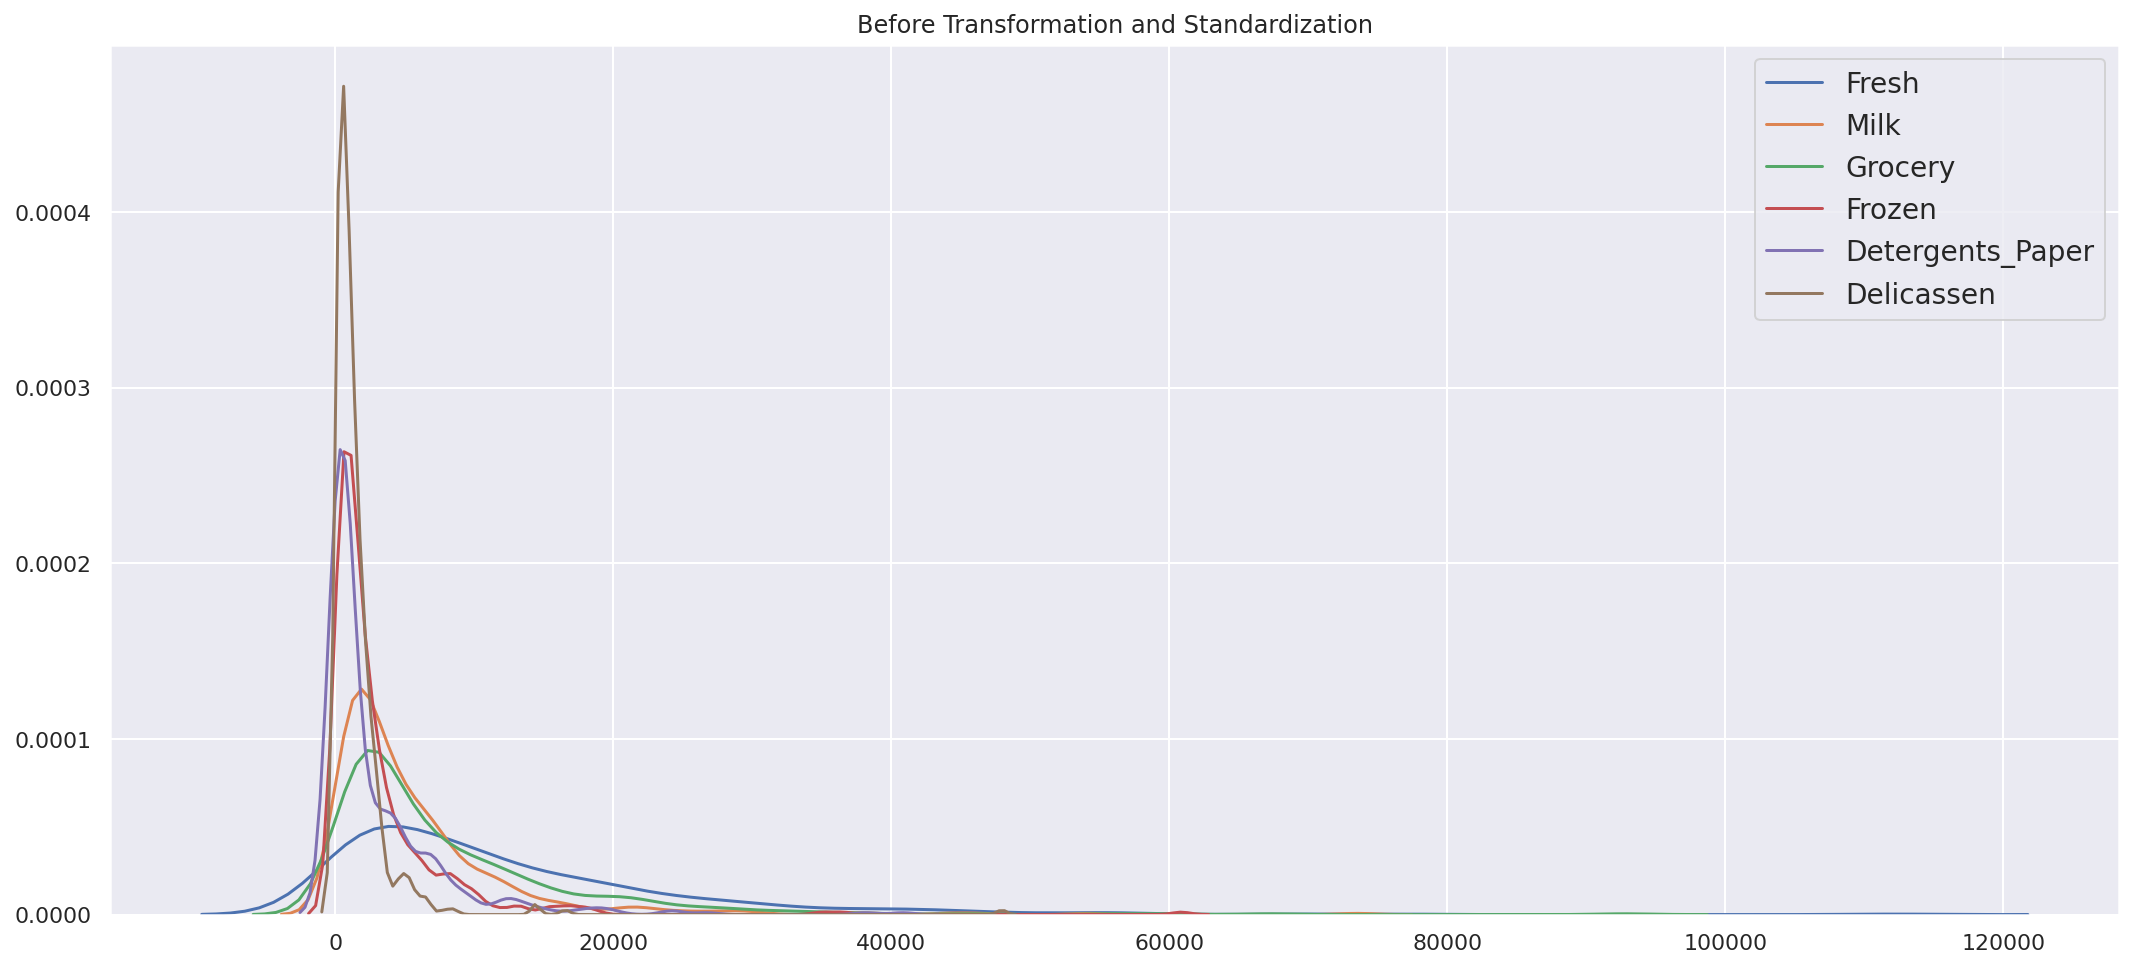

In [18]:
plt.figure(figsize = (18,8))
plt.title('Before Transformation and Standardization')

for cols in data.columns.values:
    ax = sns.kdeplot(data[cols], Label=cols)
    ax.legend(loc=0, prop={'size': 14})

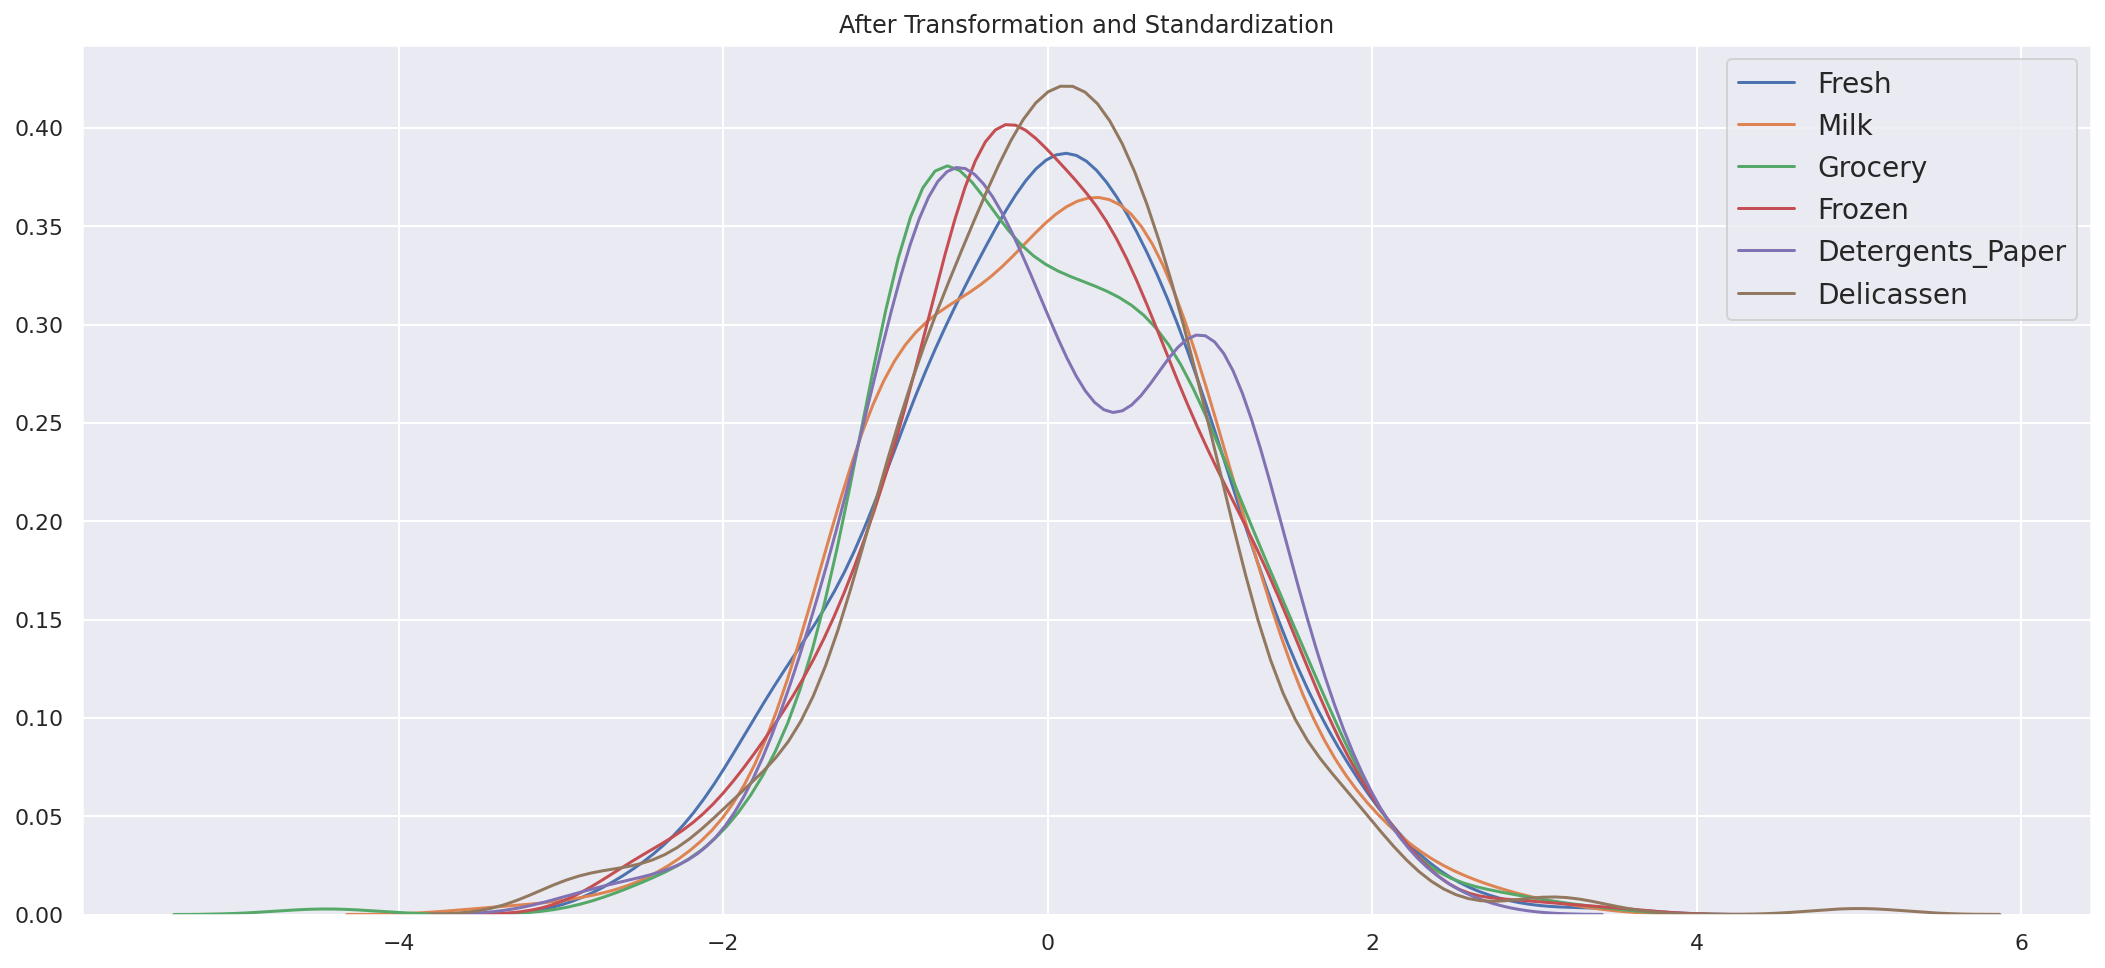

In [19]:
plt.figure(figsize = (18,8))
plt.title('After Transformation and Standardization')

for cols in data_normal.columns.values:
    ax = sns.kdeplot(data_normal[cols], Label=cols)
    ax.legend(loc=0, prop={'size': 14})

The above graph shows the normalization of the data after transformation and standardization.

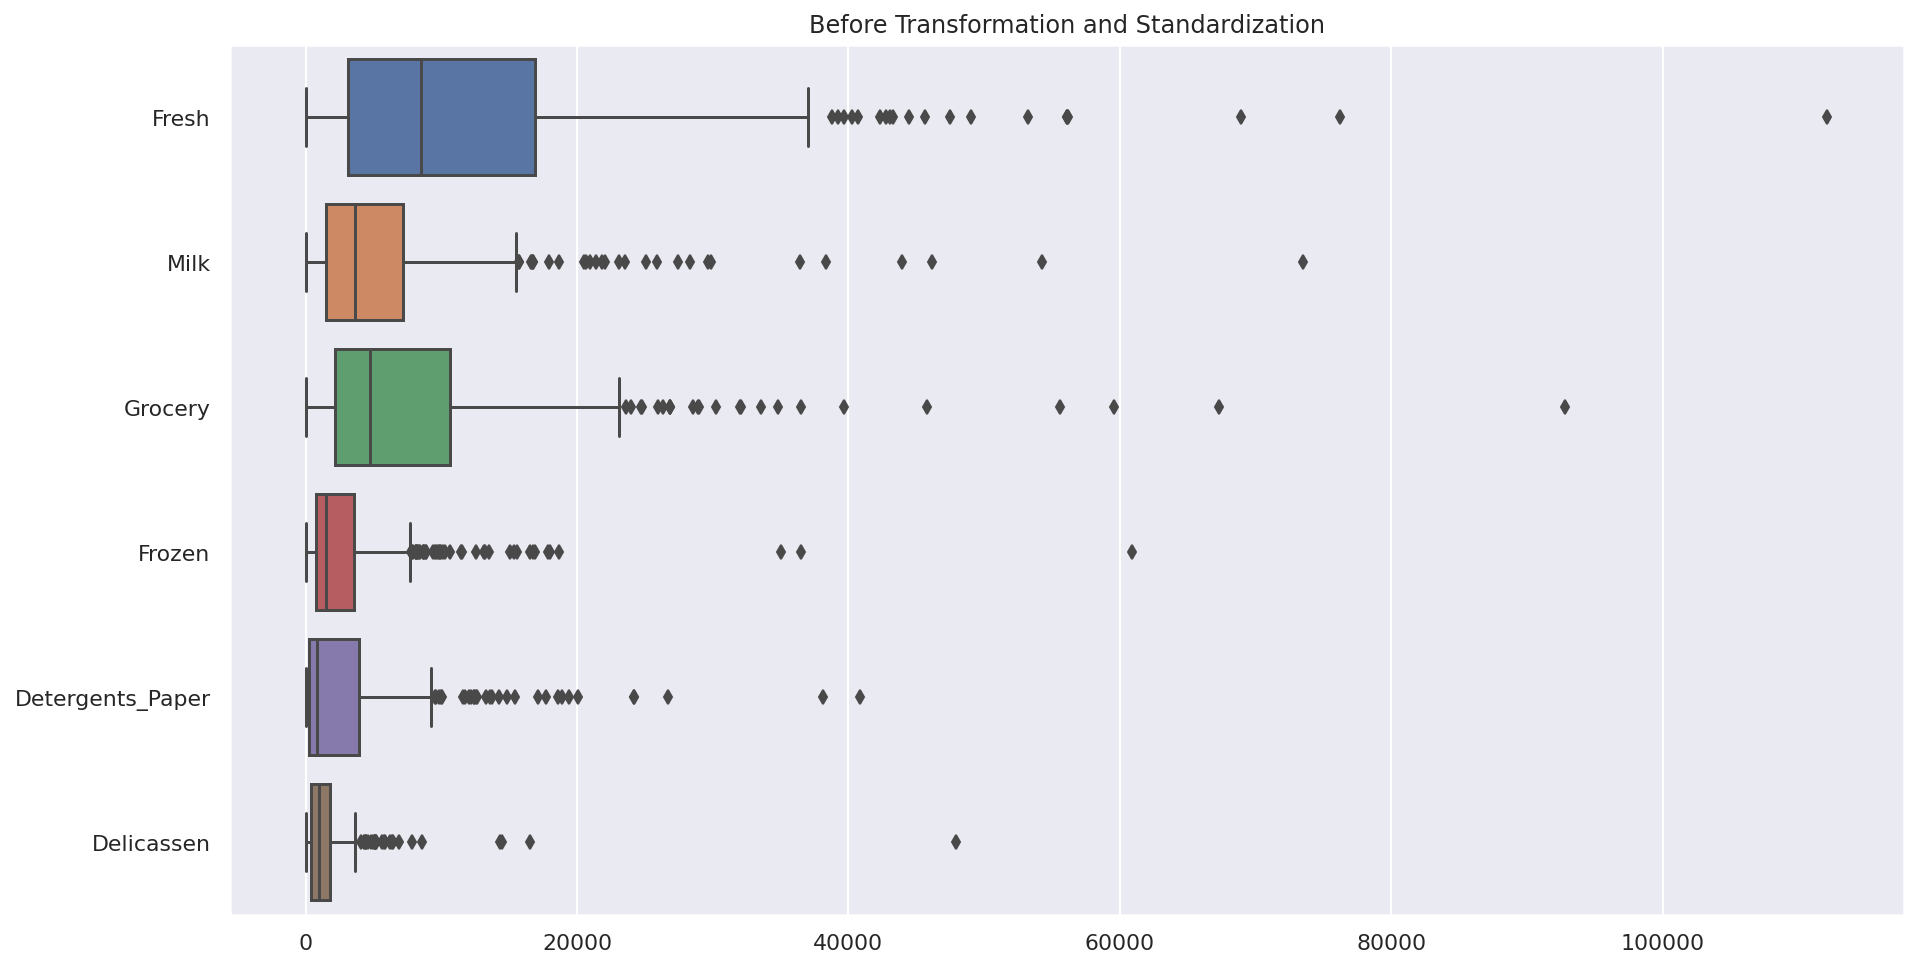

In [20]:
plt.figure(figsize = (15,8))
sns.boxplot(data=data, orient='h')
plt.title('Before Transformation and Standardization')
plt.show()

The data before the transformation and the standardization is varied with outliers and different sized ranges.

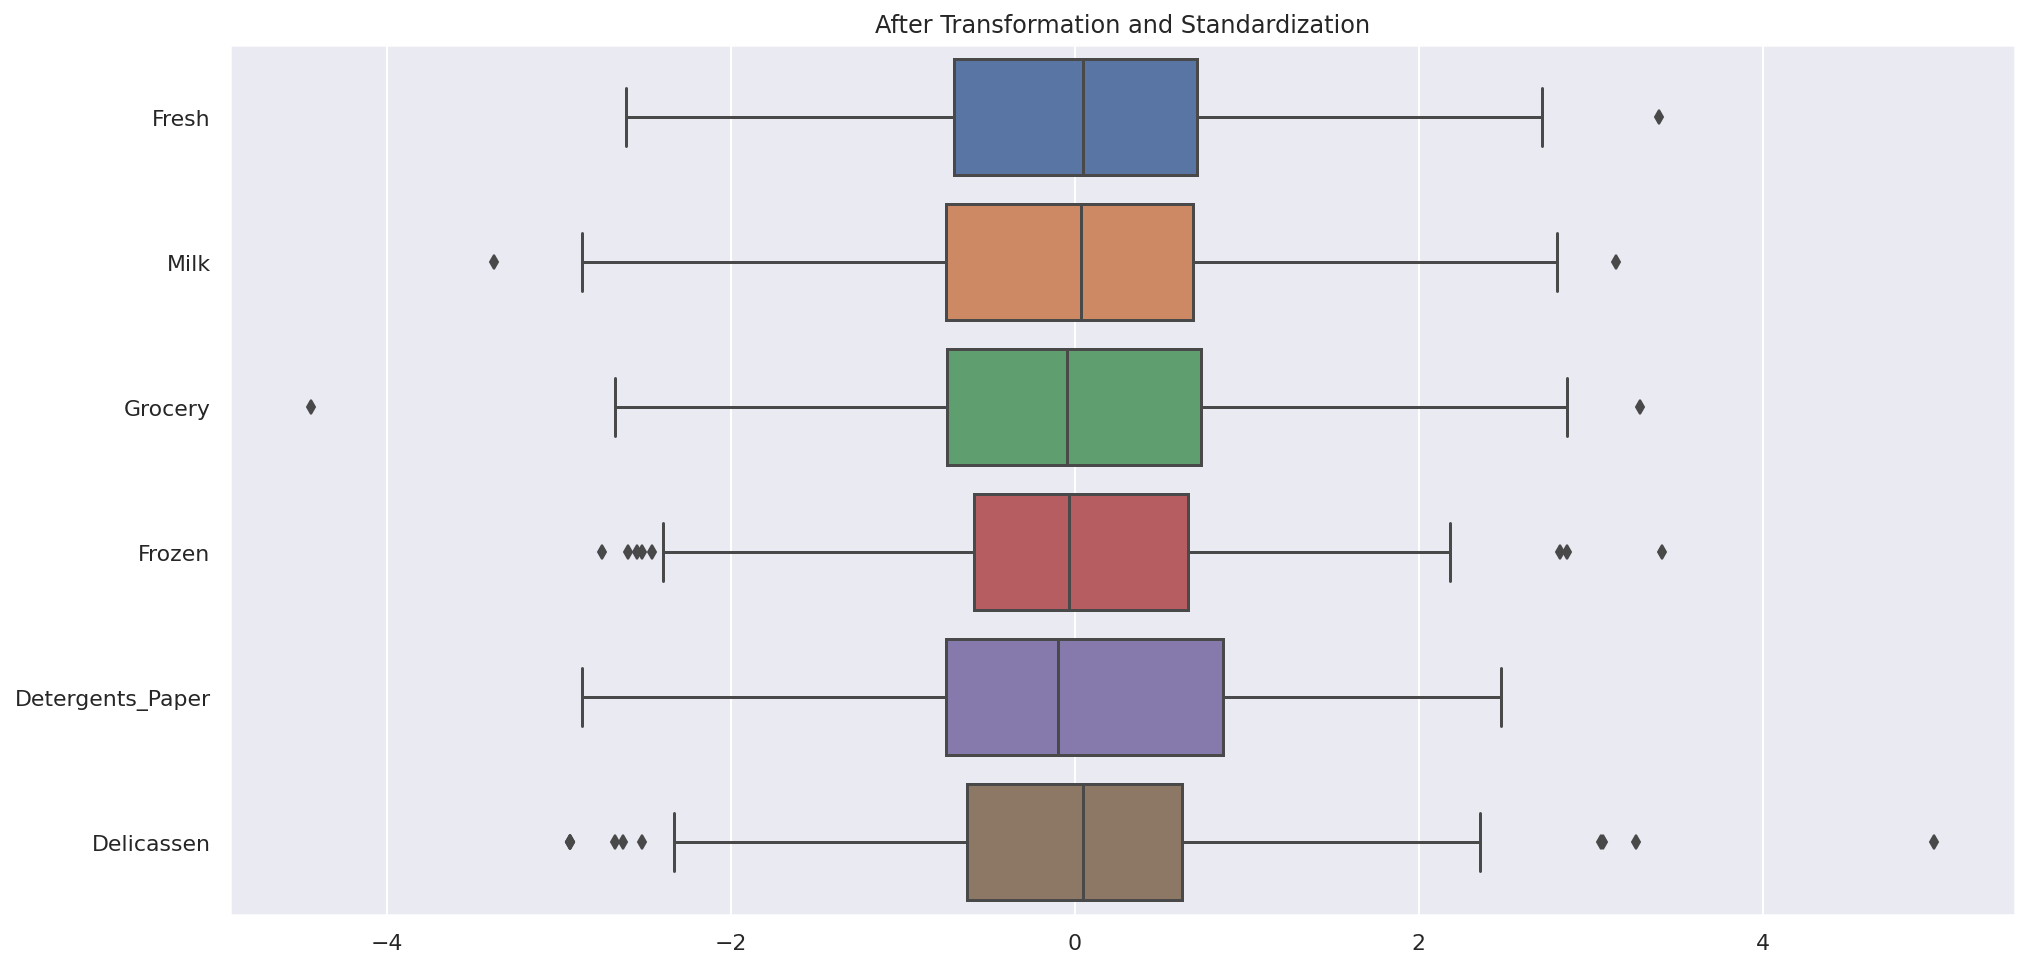

In [21]:
plt.figure(figsize = (16,8))
sns.boxplot(data=data_normal, orient='h')
plt.title('After Transformation and Standardization')
plt.show()

The data after the transformation and the standardization was repositioned around zero with less outliers and more similar ranges. The central tendencies are also more aligned among the nominal categories.

### Run kmeans with all variables:

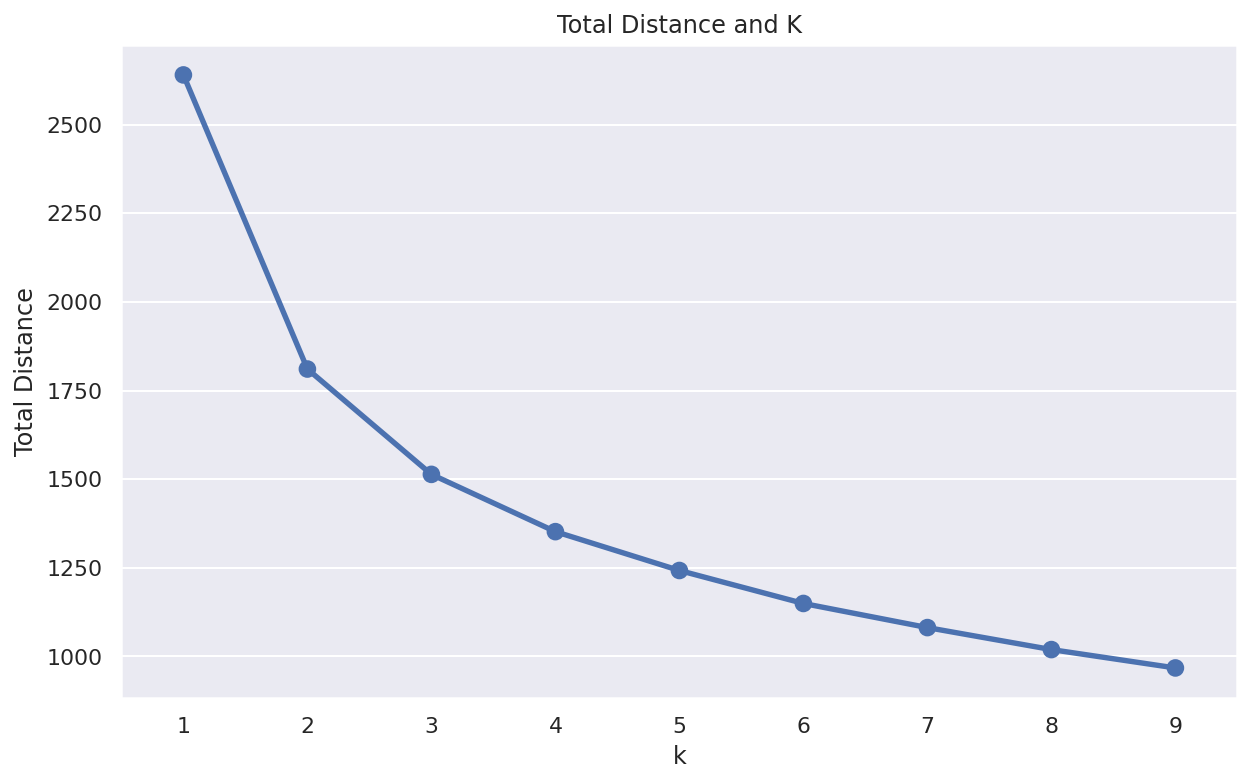

In [22]:
# try different k values to find the elbow
dist = {}

for k in range(1,10):
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state=1)
    cluster_labels = kmeans.fit_predict(data_normal)
    dist[k] = kmeans.inertia_
   
plt.figure(figsize=(10,6))
plt.xlabel('k')
plt.ylabel('Total Distance')
plt.title('Total Distance and K')
sns.pointplot(x = list(dist.keys()), y = list(dist.values()))

plt.show()

It appears that k=2 or 3 is a good choice of kvalue for our kmeans algorithm as the pivot seems to commence around those values of k.

Let's see what features are most important using PCA:

# Methodology Part 2
We decided to conduct PCA on our data for several reasons. First, we wanted to identify the most important features in our dataset in order to help us choose which variables we should focus on for our clustering analysis.PCA ranks features in a dataset through their variance, features with highest variance (that therefore explain the variance in the labels) ranking first. This also ensures our selected features wouldn’t be too close together for meaningful clustering. We expect the most important features to be strongly correlated with the labels. PCA also increases efficiency by reducing the amount of variables we utilize(dimensionality reduction and noise reduction/exclusion); we also comapred two transformations, Box-Cox and log for visualization purposes, ultimately settling for Box-Cox.PCA is done by projecting the data into the component space and then recreating the data by projecting it back, retaining the most important features of the data.

## Feature Importance Extraction with PCA

In [23]:
# PCA without specifying number of components

pca = PCA()
while True: 
    try: 
        comp = pca.fit_transform(data_normal)
        break 
    except: 
        continue


print("How much of variance in data is explained by each each component:\n")
pca.explained_variance_ratio_

How much of variance in data is explained by each each component:



array([0.44889984, 0.28002326, 0.10189812, 0.09626769, 0.04639271,
       0.02651837])

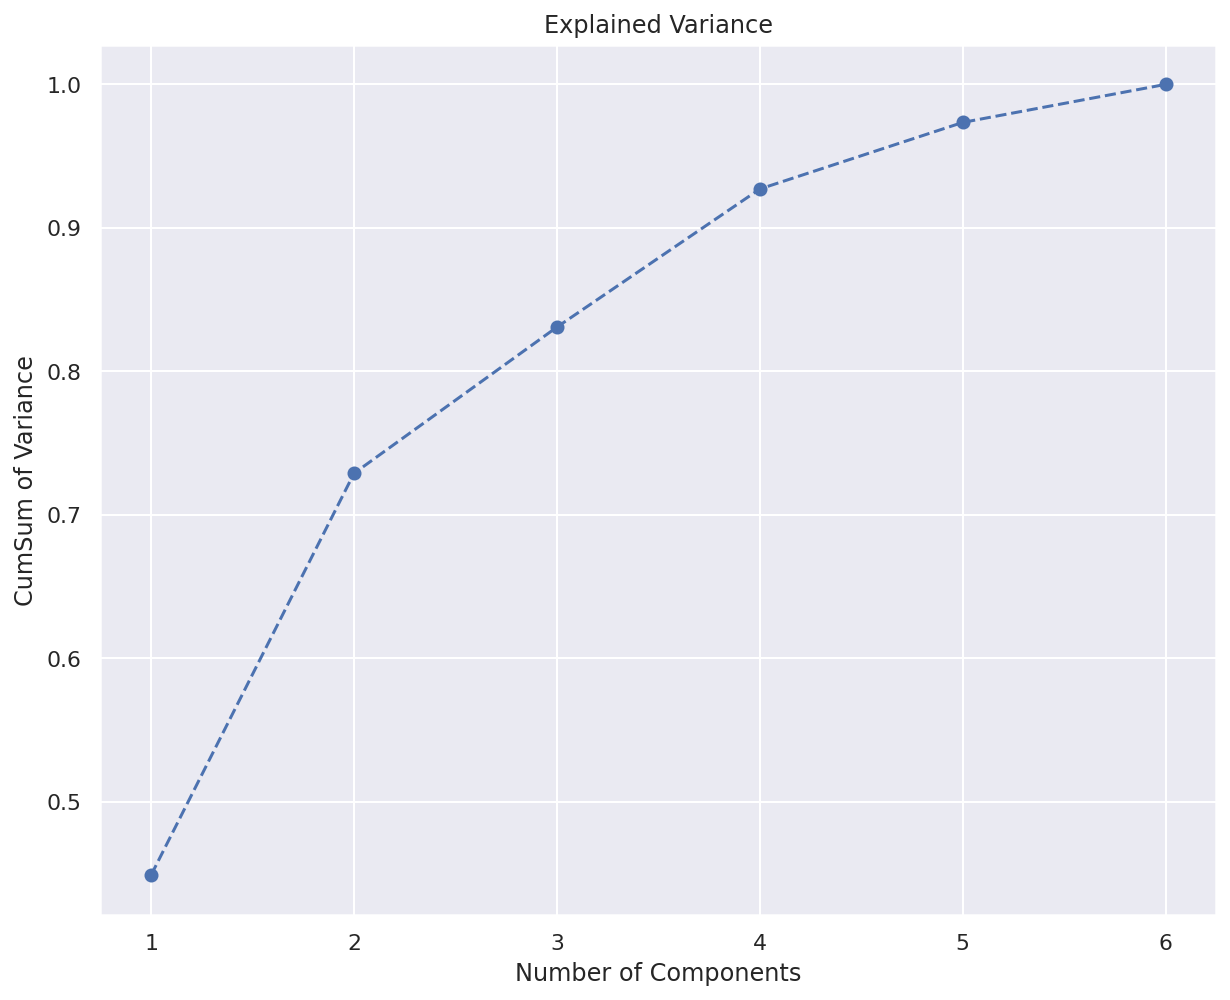

In [24]:
plt.figure(figsize=(10,8))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('CumSum of Variance')
plt.show()

80% of data is explained by only 2 components. We will test on 2 and 3 components to transform the data and then reconstruct the data to run kmeans on the reconstructed data.

In [25]:
data_normal.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [26]:
# run PCA to get 2 components
num_comp = 2

pca = PCA()
while True: 
    try: 
        pca = PCA()
        pca.fit(data_normal)
        
        # reconstruct data from 2 components
        data_2f = np.dot(pca.transform(data_normal)[:,:num_comp], pca.components_[:num_comp,:])
        
        # we need to add the mean that was removed during standard scaling
        mean_data = np.mean(data_normal, axis=0)
        data_2f += mean_data
        
        # number of components
        n_pcs= pca.components_.shape[0]

        # get the index of the most important feature on EACH component 
        # i.e. largest absolute value
        most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

        feature_names = ['Fresh', 'Milk', 'Grocery', 'Frozen', 
                                 'Detergents_Paper', 'Delicassen']

        # get the names
        important_names = [feature_names[most_important[i]] for i in range(n_pcs)]

        dic = {'PC{}'.format(i+1): important_names[i] for i in range(n_pcs)}

        print("Features sorted by importance:")
        sorted_df = pd.DataFrame(sorted(dic.items()))
        print(sorted_df)
        
        
        break 
    except: 
        continue


Features sorted by importance:
     0        1
0  PC1  Grocery
1  PC2   Frozen
2  PC3    Fresh
3  PC4   Frozen
4  PC5     Milk
5  PC6  Grocery


From the above output, we can deduce what feature is important for each component. For example, if we use PC1, "grocery" is the most important feature for PC1 component. 

# Methodology Part 3
Through PCA, we found that the most important features are Fresh, Frozen and Grocery products. This led us to developing our hypothesis. 

### Run kmeans on PCA transformed/reconstructed data (only 2 features):

In [27]:
# get 2 columns of the reconstructed data
data_2f = data_2f[:, 0:2]

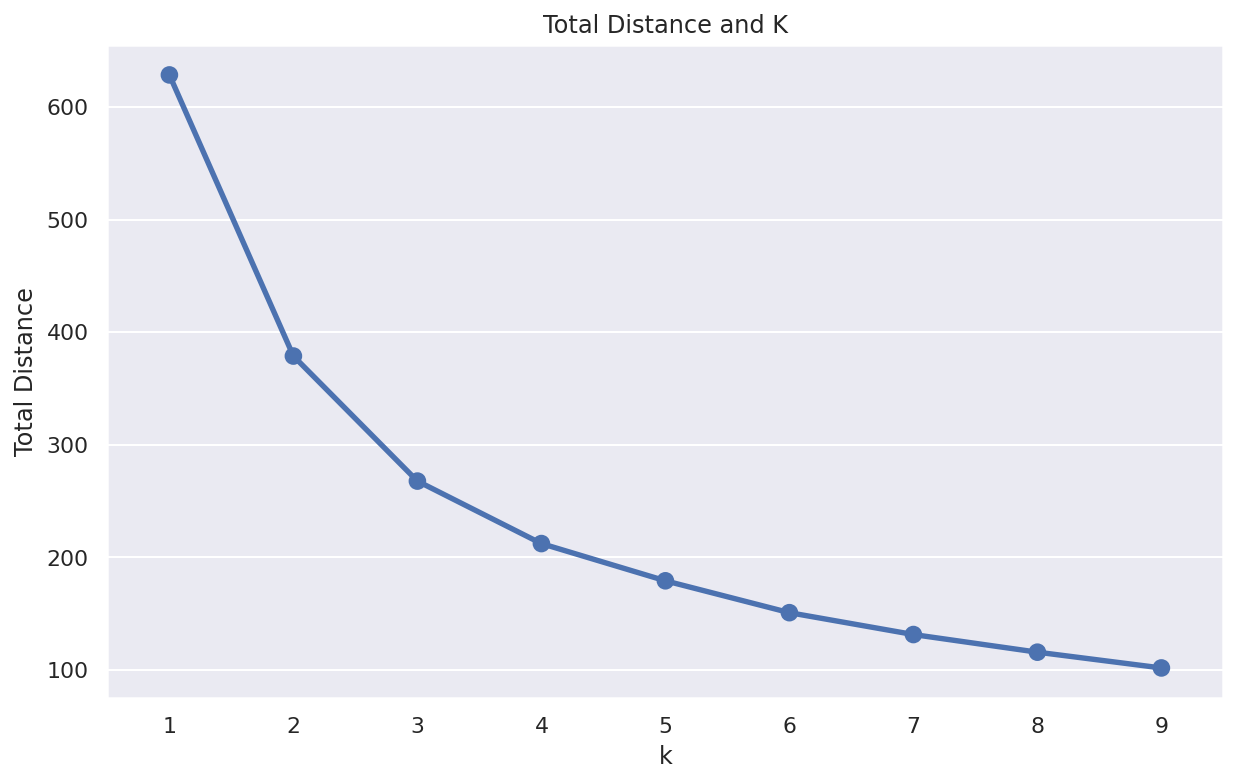

In [28]:
# try different k values to find the elbow
dist = {}

for k in range(1,10):
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state=1)
    # using data_2f (reduced data)
    cluster_labels = kmeans.fit_predict(data_2f)
    dist[k] = kmeans.inertia_
   
plt.figure(figsize=(10,6))
plt.xlabel('k')
plt.ylabel('Total Distance')
plt.title('Total Distance and K')
sns.pointplot(x = list(dist.keys()), y = list(dist.values()))

plt.show()

From the plot above, we can run kmeans with 2 and 3 clusters using the reduced data.

In [29]:
# k=2 
kmeans_2f = KMeans(n_clusters = 2, init='k-means++', max_iter = 1000, random_state = 1)
kmeans_2f.fit(data_2f)
predict = kmeans_2f.predict(data_2f)
centers = kmeans_2f.cluster_centers_

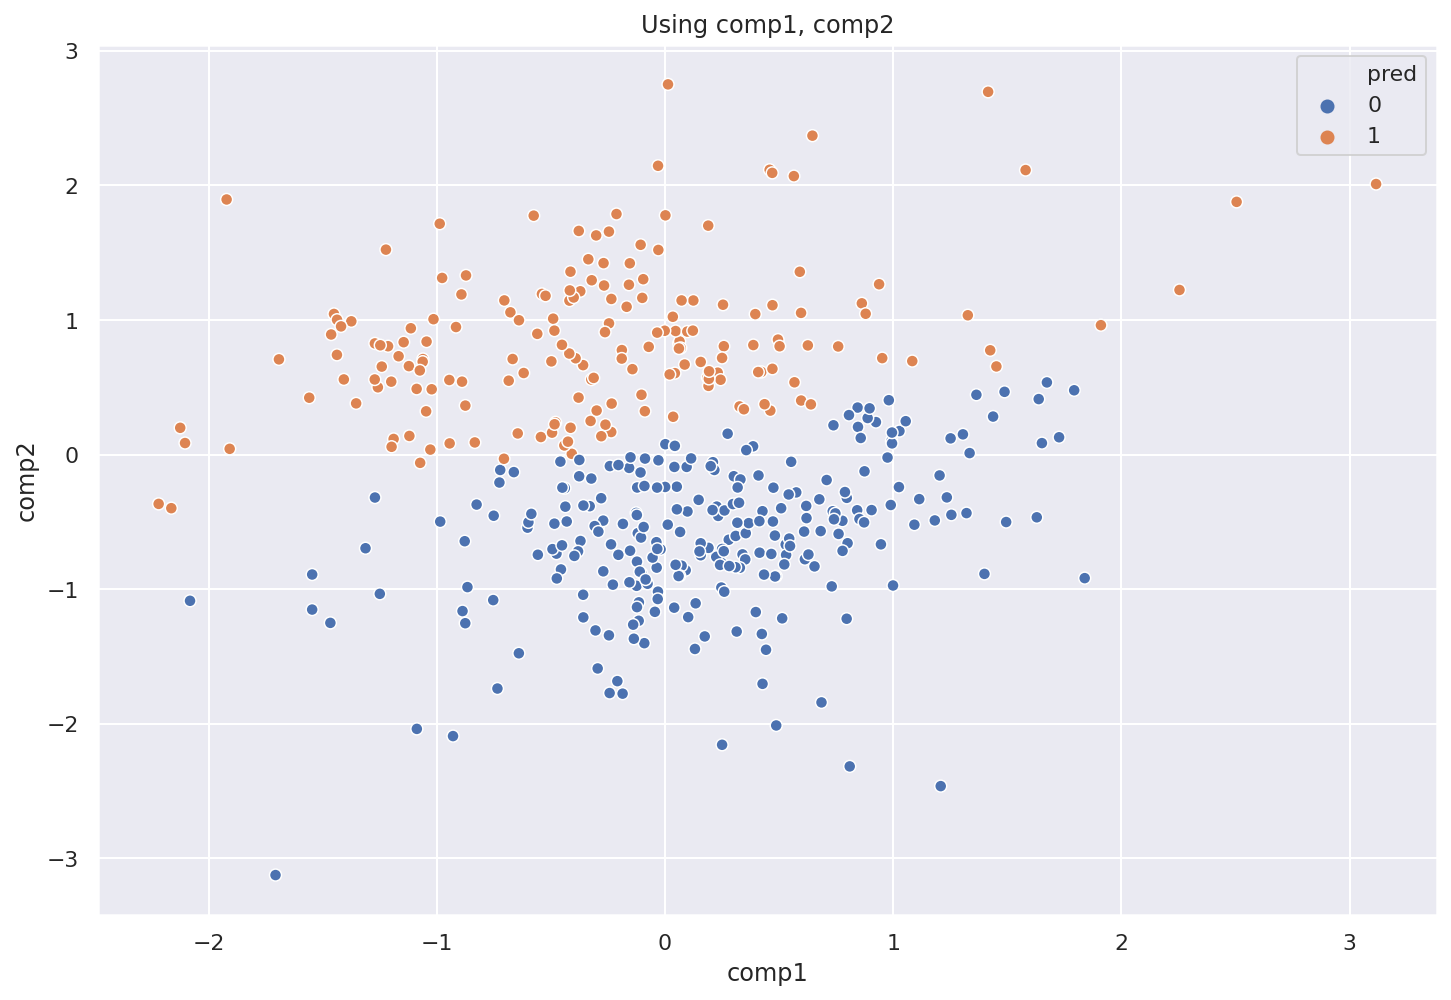

In [30]:
plt.figure(figsize = (12,8))
X = pd.DataFrame(data_2f[:, [0,1]], columns=['comp1', 'comp2'])

# we will use kmeans_2f prediction to plot the 2 clusters 
# and compare it below with "channel" label
X['pred'] = predict
sns.scatterplot('comp1', 'comp2', data=X, hue='pred', palette="deep")
plt.title('Using comp1, comp2')
plt.show()
#plt.legend()

Utilizing both component 1 and 2 for the kmeans algorithm, we get an almost medial split on the data around the 0 component 1 axis.

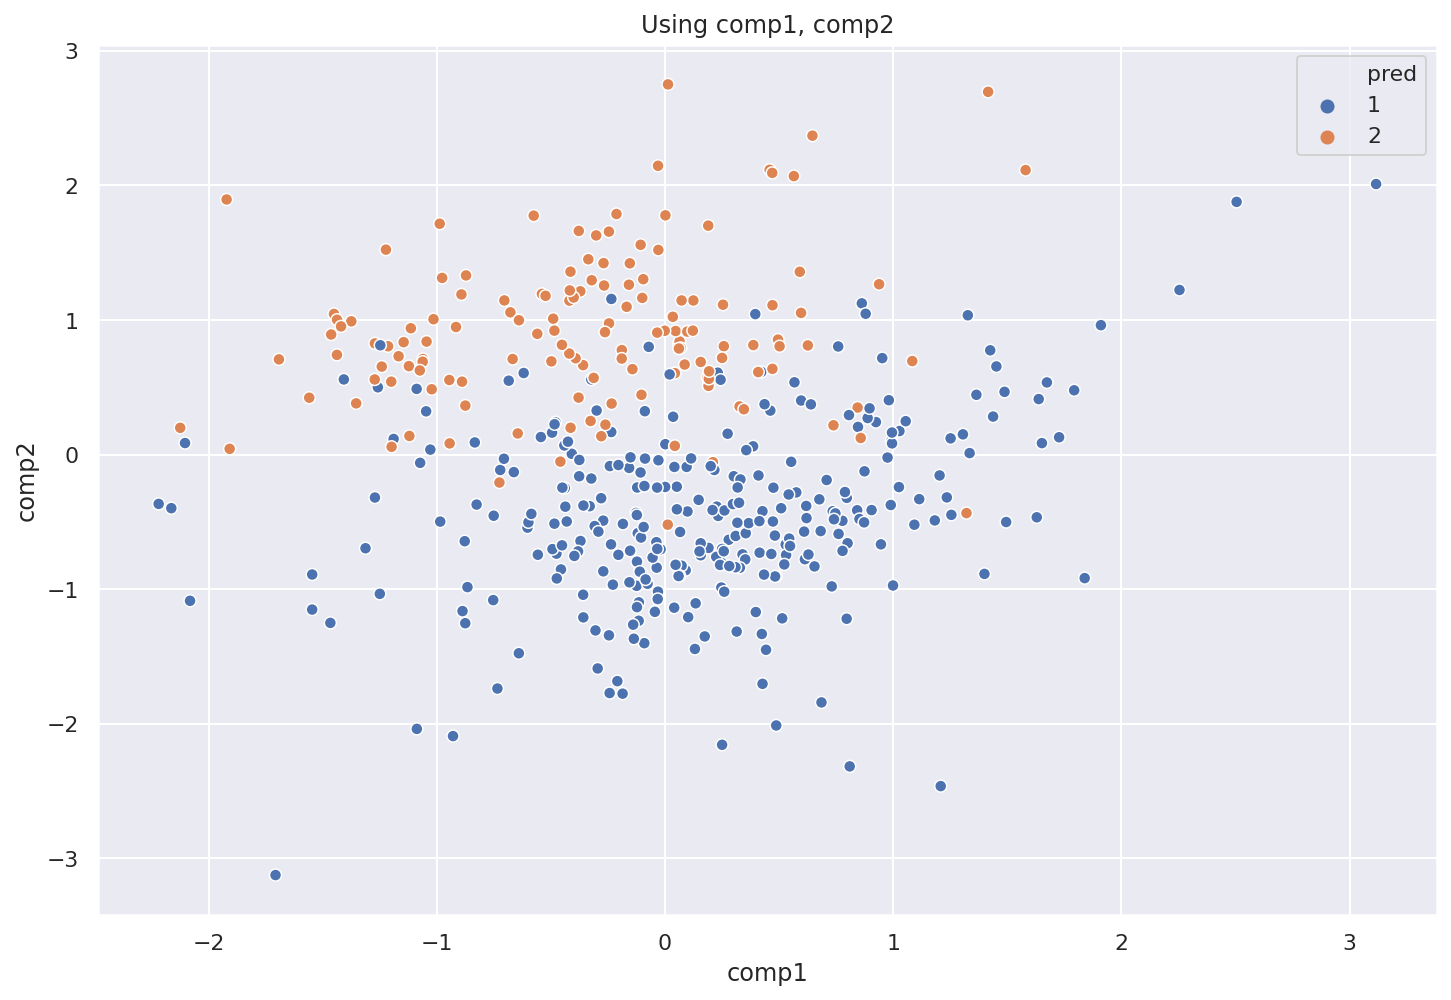

In [31]:
plt.figure(figsize = (12,8))
X = pd.DataFrame(data_2f[:, [0,1]], columns=['comp1', 'comp2'])

# using Channel column to compare plots
X['pred'] = Channel
sns.scatterplot('comp1', 'comp2', data=X, hue='pred', palette="deep")
plt.title('Using comp1, comp2')
plt.show()
#plt.legend()

Let's try 3 components to transform and reconstruct data:

In [32]:
# run PCA to get 3 components
num_comp = 3

pca = PCA()
while True: 
    try: 
        pca = PCA()
        pca.fit(data_normal)
        
        # reconstruct data from 3 components
        data_3f = np.dot(pca.transform(data_normal)[:,:num_comp], pca.components_[:num_comp,:])
        
        # we need to add the mean that was removed during standard scaling
        mean_data = np.mean(data_normal, axis=0)
        data_3f += mean_data
        
        # number of components
        n_pcs= pca.components_.shape[0]

        # get the index of the most important feature on EACH component 
        # i.e. largest absolute value
        most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

        feature_names = ['Fresh', 'Milk', 'Grocery', 'Frozen', 
                                 'Detergents_Paper', 'Delicassen']

        # get the names
        important_names = [feature_names[most_important[i]] for i in range(n_pcs)]

        dic = {'PC{}'.format(i+1): important_names[i] for i in range(n_pcs)}

        print("Features sorted by importance:")
        sorted_df = pd.DataFrame(sorted(dic.items()))
        print(sorted_df)
        
        break 
    except: 
        continue


Features sorted by importance:
     0        1
0  PC1  Grocery
1  PC2   Frozen
2  PC3    Fresh
3  PC4   Frozen
4  PC5     Milk
5  PC6  Grocery


In [33]:
data_3f.shape

(440, 6)

In [34]:
# get 3 columns of the reduced/reconstruced data
data_3f = data_3f[:, 0:3]

## Check with Elbow Curve
We performed the elbow test to see what the ideal cluster size could be so we could uncover any possibilities of hidden market segments not covered by the labels but revealed via clustering.

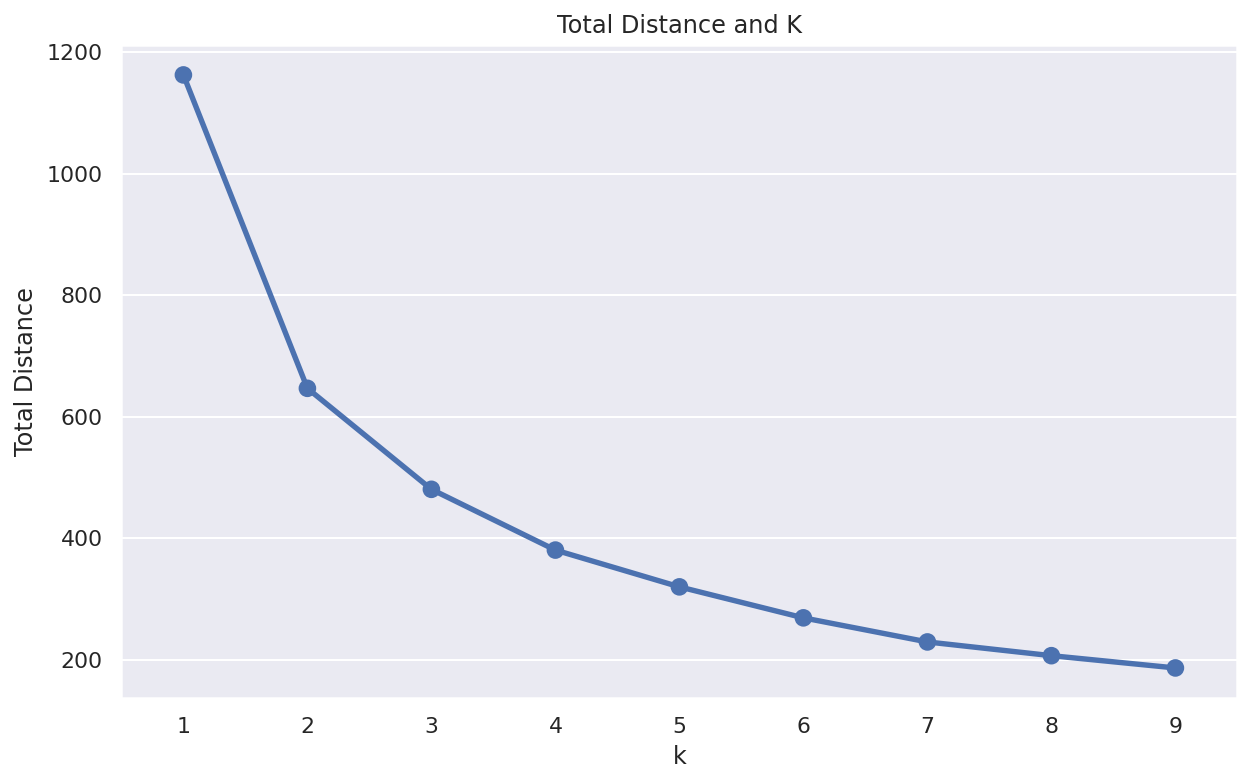

In [35]:
# try different k values to find the elbow
dist = {}

for k in range(1,10):
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state=1)
    # using data_3f (reduced data)
    cluster_labels = kmeans.fit_predict(data_3f)
    dist[k] = kmeans.inertia_
   
plt.figure(figsize=(10,6))
plt.xlabel('k')
plt.ylabel('Total Distance')
plt.title('Total Distance and K')
sns.pointplot(x = list(dist.keys()), y = list(dist.values()))

plt.show()

In [36]:
# k=2 
kmeans_3f = KMeans(n_clusters = 2, init='k-means++', max_iter = 1000, random_state = 1)
kmeans_3f.fit(data_3f)
predict_3f = kmeans_3f.predict(data_3f)
centers = kmeans_3f.cluster_centers_

In [ ]:
first = data_3f[:, 0]
second = data_3f[:, 1]
third = data_3f[:, 2]
lab = {'x': 'Comp 1', 'y':'Comp2', 'z': 'Comp3'}
title_s = 'Plot of 3 components colored by predicted clusters'
fig = explot.scatter_3d(x=first, y = second, z = third,labels=lab, title=title_s, color = predict_3f, width=900, height=600)
fig.show()

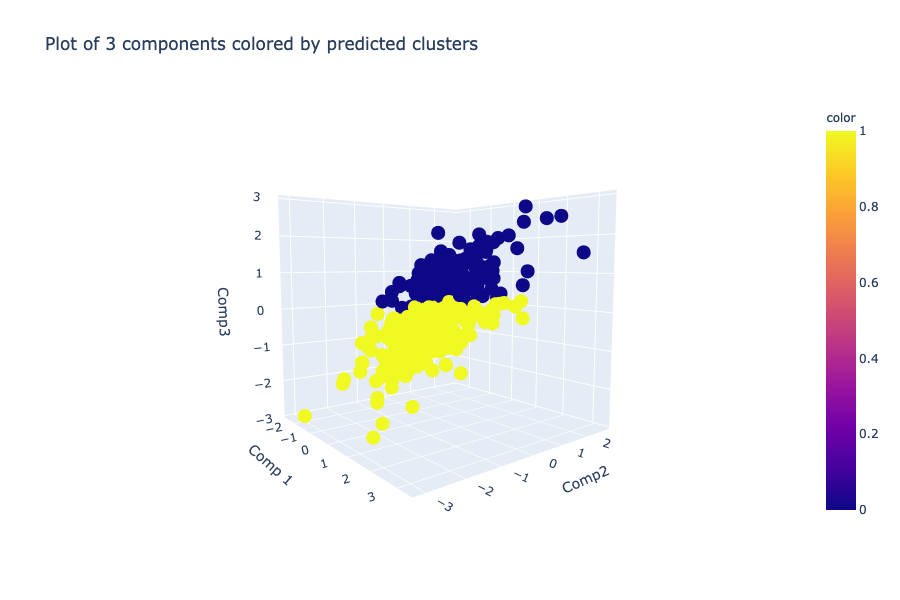

In [3]:
# insert snapshot of the 3d plot that doesn't appear in pdf
from IPython.core.display import Image
Image("./1.png")

In [ ]:
# using Channel column to compare plots

first = data_3f[:, 0]
second = data_3f[:, 1]
third = data_3f[:, 2]
title_s = 'Plot of 3 components colored by 2 channels'
fig = explot.scatter_3d(x=first, y = second, z = third, title=title_s, 
                        labels=lab, color = Channel, width=900, height=600)
fig.show()

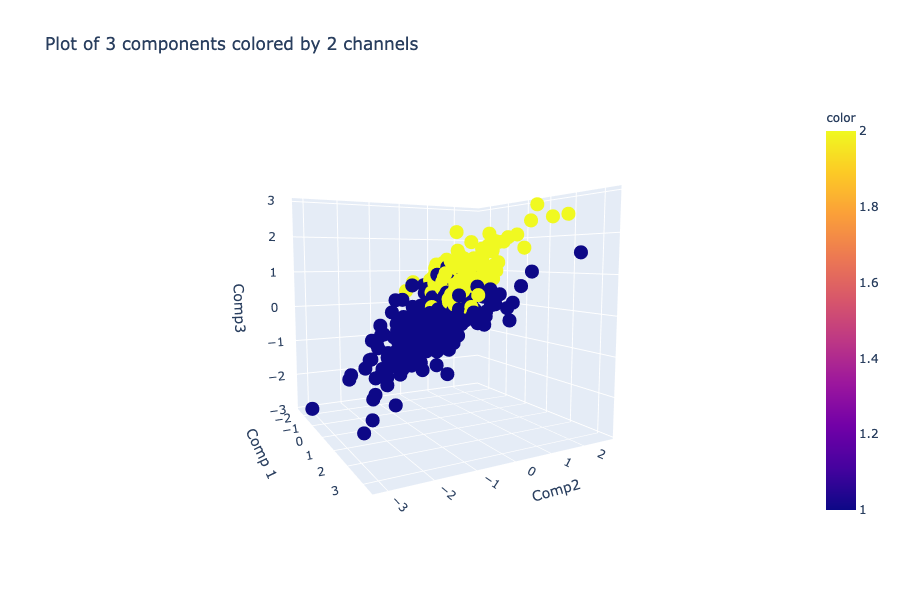

In [4]:
# insert snapshot of the 3d plot that doesn't appear in pdf
Image("./2.png")

The two graphs above have some similarity in how they show the 2 clusters. The second graph contains the labels grpah of the data and as we can observe, the split is not exactly on the zero value of the comp1 axis and overlapps with the 2 labels. 

Now let's try using 3 clusters on the reduced data:

In [39]:
# k=3
kmeans_2f_3c = KMeans(n_clusters = 3, init='k-means++', max_iter = 1000, random_state = 1)
kmeans_2f_3c.fit(data_2f)
predict_3c = kmeans_2f_3c.predict(data_2f)
centers_3c = kmeans_2f_3c.cluster_centers_

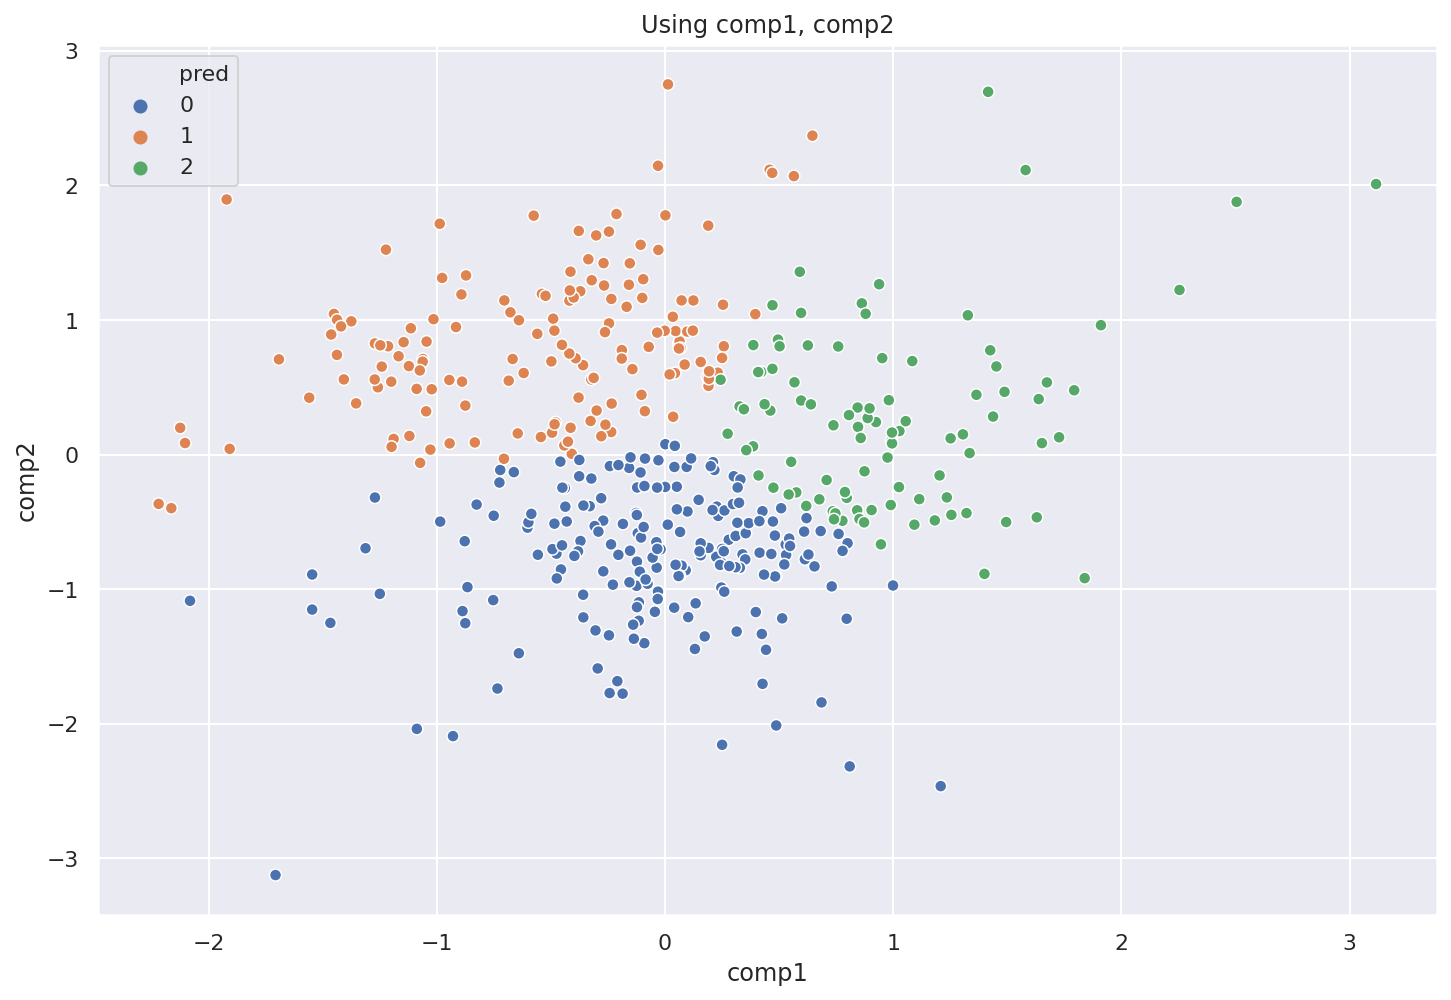

In [40]:
plt.figure(figsize = (12,8))
X = pd.DataFrame(data_2f[:, [0,1]], columns=['comp1', 'comp2'])

# we will use kmeans_2f_3c prediction to plot the 3 clusters 
# and compare it below with "region" label
X['pred'] = predict_3c
sns.scatterplot('comp1', 'comp2', data=X, hue='pred', palette="deep")
plt.title('Using comp1, comp2')
plt.show()
#plt.legend()

Using the 3 clusters gives us a triple separation that distinguishes 0,1, and 2 from each other. 

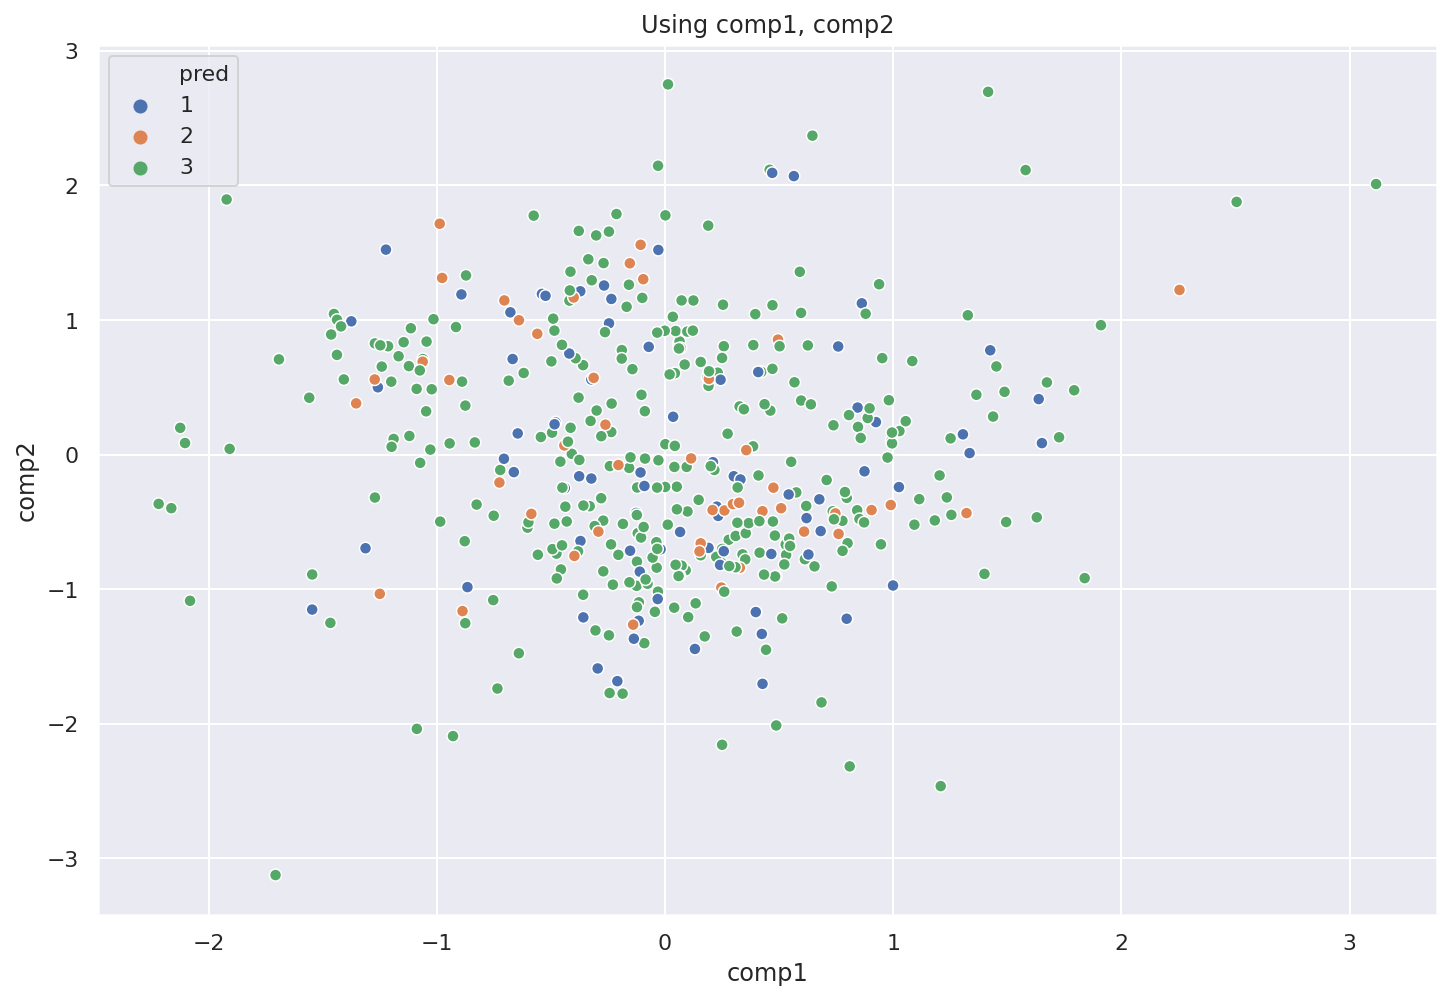

In [41]:
plt.figure(figsize = (12,8))
X = pd.DataFrame(data_2f[:, [0,1]], columns=['comp1', 'comp2'])

# using Region column to compare plots
X['pred'] = Region
sns.scatterplot('comp1', 'comp2', data=X, hue='pred', palette="deep")
plt.title('Using comp1, comp2')
plt.show()
#plt.legend()

The 2 plots above are very different in how they show 3 clusters and 3 regions. The graph above shows more of an overlap than the 3 k-means clusters.

Let's try 3 features from PCA:

## Extracting Three Features Utilizing PCA

In [42]:
# run PCA to get 3 components
num_comp = 3

pca = PCA()
while True: 
    try: 
        pca = PCA()
        pca.fit(data_normal)
        
        # reconstruct data from 2 components
        data_3f = np.dot(pca.transform(data_normal)[:,:num_comp], pca.components_[:num_comp,:])
        
        # we need to add the mean that was removed during standard scaling
        mean_data = np.mean(data_normal, axis=0)
        data_3f += mean_data
        
        # number of components
        n_pcs= pca.components_.shape[0]

        # get the index of the most important feature on EACH component 
        # i.e. largest absolute value
        most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

        feature_names = ['Fresh', 'Milk', 'Grocery', 'Frozen', 
                                 'Detergents_Paper', 'Delicassen']

        # get the names
        important_names = [feature_names[most_important[i]] for i in range(n_pcs)]

        dic = {'PC{}'.format(i+1): important_names[i] for i in range(n_pcs)}

        print("Features sorted by importance:")
        sorted_df = pd.DataFrame(sorted(dic.items()))
        print(sorted_df)
        
        break 
    except: 
        continue

Features sorted by importance:
     0        1
0  PC1  Grocery
1  PC2   Frozen
2  PC3    Fresh
3  PC4   Frozen
4  PC5     Milk
5  PC6  Grocery


In [43]:
data_3f = data_3f[:, 0:3]

In [44]:
data_3f.shape

(440, 3)

In [45]:
# k=3
kmeans_3f_3c = KMeans(n_clusters = 3, init='k-means++', max_iter = 1000, random_state = 1)
kmeans_3f_3c.fit(data_3f)
predict_3f_3c = kmeans_3f_3c.predict(data_3f)
centers_3f_3c = kmeans_3f_3c.cluster_centers_

In [ ]:
first = data_3f[:, 0]
second = data_3f[:, 1]
third = data_3f[:, 2]
title_s = 'Plot of 3 components colored by 3 predicted clusters'
fig = explot.scatter_3d(x=first, y = second, z = third, title=title_s,
                        labels=lab, color = predict_3f_3c, width=900, height=600)
fig.show()

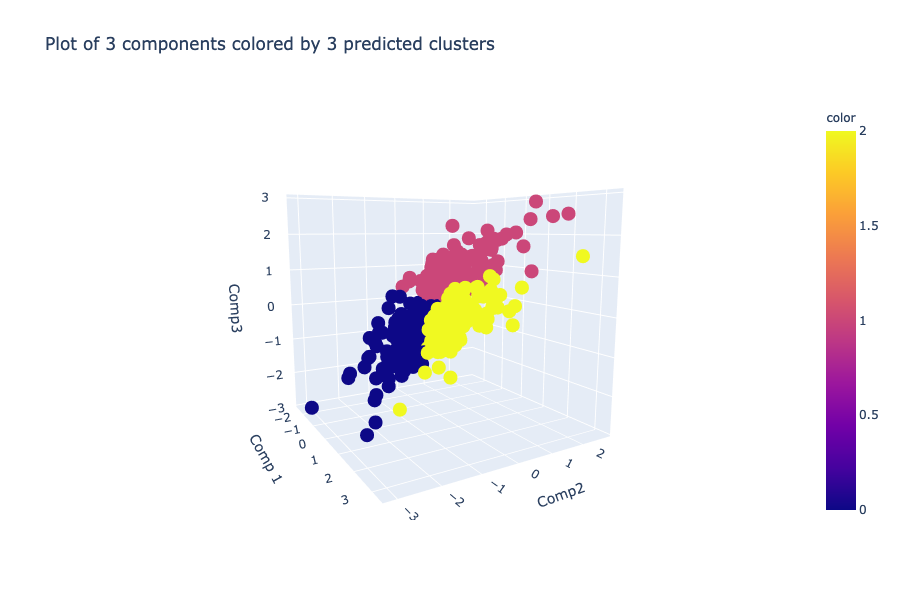

In [5]:
# insert snapshot of the 3d plot that doesn't appear in pdf
Image("./3.png")

In [ ]:
# using Region column to compare plots

first = data_3f[:, 0]
second = data_3f[:, 1]
third = data_3f[:, 2]
title_s = 'Plot of 3 components colored by 3 regions'
fig = explot.scatter_3d(x=first, y = second, z = third, title=title_s,
                        labels=lab, color = Region, width=900, height=600)
fig.show()

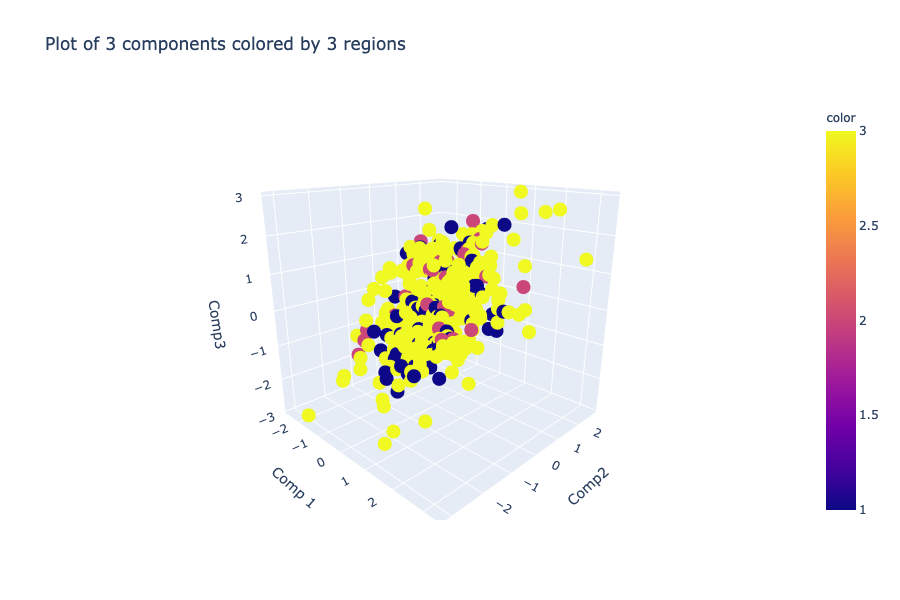

In [6]:
# insert snapshot of the 3d plot that doesn't appear in pdf
Image("./4.png")

## SideNote: Results
We reconstructed our data after conducting PCA, allowing us to create clusters with less noise. With our new reconstructed data, we performed two k-means clustering analyses at k=2 and k=3, as this was the number of groupings with the two possible labels. Also, just to check we performed the elbow test to see what the ideal cluster size could be so we could uncover any possibilities of hidden market segments not covered by the labels but revealed via clustering. We found that our hypothesis was correct. The clusters created at k=2 were very similar to the channel labels. However, the k=3 clusters were very different from the location labels, which was quite evenly distributed across the three variables. The elbow of the total distance graph also matched with k=2, showing not only that the cluster resembles the channel label, but also are ideal for representing this data.We generated 3d plots with the axes defined as fresh, frozen and grocery products, and colored in the points by our labels, giving us the opportunity to draw meaningful conclusions about the relationship between the wholesale products and channel.

## Discussion
As we had previously predicted, through PCA and clustering analysis we discovered that Grocery, Frozen and Fresh products are clearly clustered with channel. One reason for this could be that grocery and frozen products are frequently sold at retail locations, whereas restaurants, cafes and hotels may opt for fresh products. In accordance with this, grocery and frozen products were clustered by Channel 2 (retail) and fresh products were clustered by Channel 1 (cafes, restaurants and hotels). 

We also did not end up finding any significant clusters by region, as expected. Perhaps such a pattern would appear when data is explored over more regions, and with more instances. It is also possible that all regions in Portugal, or any one country, may have similar spending patterns. Therefore, for future analyses it may be useful to combine data that spans a larger geographical region. We could also look at other variables such as Delicatessen that could be considered more expensive and thus reveal differences in region spending patterns. Lastly, the “Other” option in the region label was very vague without any context provided, so working with more specific labels could help in the future.

Overall, we believe that we were able to use clustering to match sectors of the market that did exist. However, clustering can only show that these groups exist and provides few details regarding their identification, as shown in how it differs wildly from the Region and Channel labels. Thus it can be used as a good first step in trying to better understand a business’ clientele.


## Ethics and Privacy 
There were no issues of personal privacy when it came to this dataset, because both the region and channel attributes were given nominal values. There was no personally identifiable information. If we were to publish our research we could further anonymize the region although that isn’t necessary. 

We did not find any outstanding ethical issues with our data although there is a possibility of such analysis being used for marketing. However, individual items of sale are never revealed and therefore we do not create significant openings for others to use this data and research for marketing purposes. 


## Resources
Stephanie Glen. "Box Cox Transformation" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/box-cox-transformation/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#r06d6d75f824a-4

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
